In [5]:
import pandas as pd

# Load data
file_path = './MagellanData.xlsx'
xls = pd.ExcelFile(file_path)
fmagx_df = xls.parse('FMAGX')
gacs_df = xls.parse('GACs')

# Clean FMAGX
fmagx_df.replace(-9999, pd.NA, inplace=True)
fmagx_df_long = fmagx_df.melt(id_vars=['yyyy'], var_name='month', value_name='return')
fmagx_df_long['month'] = fmagx_df_long['month'].str.extract('(\d+)').astype(int)
fmagx_df_long['date'] = pd.to_datetime(fmagx_df_long['yyyy'].astype(str) + '-' + fmagx_df_long['month'].astype(str))
fmagx_df_long = fmagx_df_long.drop(columns=['yyyy', 'month']).set_index('date').sort_index()
fmagx_df_long = fmagx_df_long[(fmagx_df_long['return'] > -100) & (fmagx_df_long['return'] < 100)]  # remove extreme outliers

# Clean GACs
gacs_df = gacs_df.rename(columns={'Month': 'date'})
gacs_df['date'] = pd.to_datetime(gacs_df['date'])
gacs_df.set_index('date', inplace=True)

# Export cleaned data
fmagx_df_long.to_csv('Cleaned_FMAGX.csv')
gacs_df.to_csv('Cleaned_GACs.csv')


In [16]:
import pandas as pd

# Load the original CSV file
gacs_df = pd.read_csv('Cleaned_GACs.csv', index_col='date', parse_dates=True)

# Sort the DataFrame by date
gacs_df = gacs_df.sort_index()

# Save the sorted DataFrame to a new CSV file
gacs_df.to_csv('Sorted_Cleaned_GACs.csv')

print("Data has been sorted by date and saved to 'Sorted_Cleaned_GACs.csv'")


Data has been sorted by date and saved to 'Sorted_Cleaned_GACs.csv'


In [31]:
import pandas as pd

# Load the CSV file (adjust the file path as needed)
magellan_data = pd.read_csv('Cleaned_FMAGX.csv')
gac_data = pd.read_csv('Cleaned_GACs.csv')

# Display the data types of each column in the Magellan data
print("Data types for Magellan Fund (FMAGX) data:")
print(magellan_data.dtypes)
print("\n")

# Display the data types of each column in the GACs data
print("Data types for General Asset Classes (GACs) data:")
print(gac_data.dtypes)


Data types for Magellan Fund (FMAGX) data:
date       object
return    float64
dtype: object


Data types for General Asset Classes (GACs) data:
date          object
Gac 1         object
Gac 2         object
Gac 3         object
Gac 4         object
Gac 5         object
Gac 6         object
Gac 7         object
Gac 8         object
Gac 9         object
Gac 10        object
Gac 11        object
Gac 12        object
Gac 13        object
Gac 14        object
Gac 15        object
Core3         object
Inflation    float64
dtype: object


Columns in DataFrame:
Index(['date', 'Gac 1', 'Gac 2', 'Gac 3', 'Gac 4', 'Gac 5', 'Gac 6', 'Gac 7',
       'Gac 8', 'Gac 9', 'Gac 10', 'Gac 11', 'Gac 12', 'Gac 13', 'Gac 14',
       'Gac 15', 'Core3', 'Inflation'],
      dtype='object')

DataFrame dtypes after conversion:
Gac 1        float64
Gac 2        float64
Gac 3        float64
Gac 4        float64
Gac 5        float64
Gac 6        float64
Gac 7        float64
Gac 8        float64
Gac 9        float64
Gac 10       float64
Gac 11       float64
Gac 12       float64
Gac 13       float64
Gac 14       float64
Gac 15       float64
Core3        float64
Inflation    float64
dtype: object


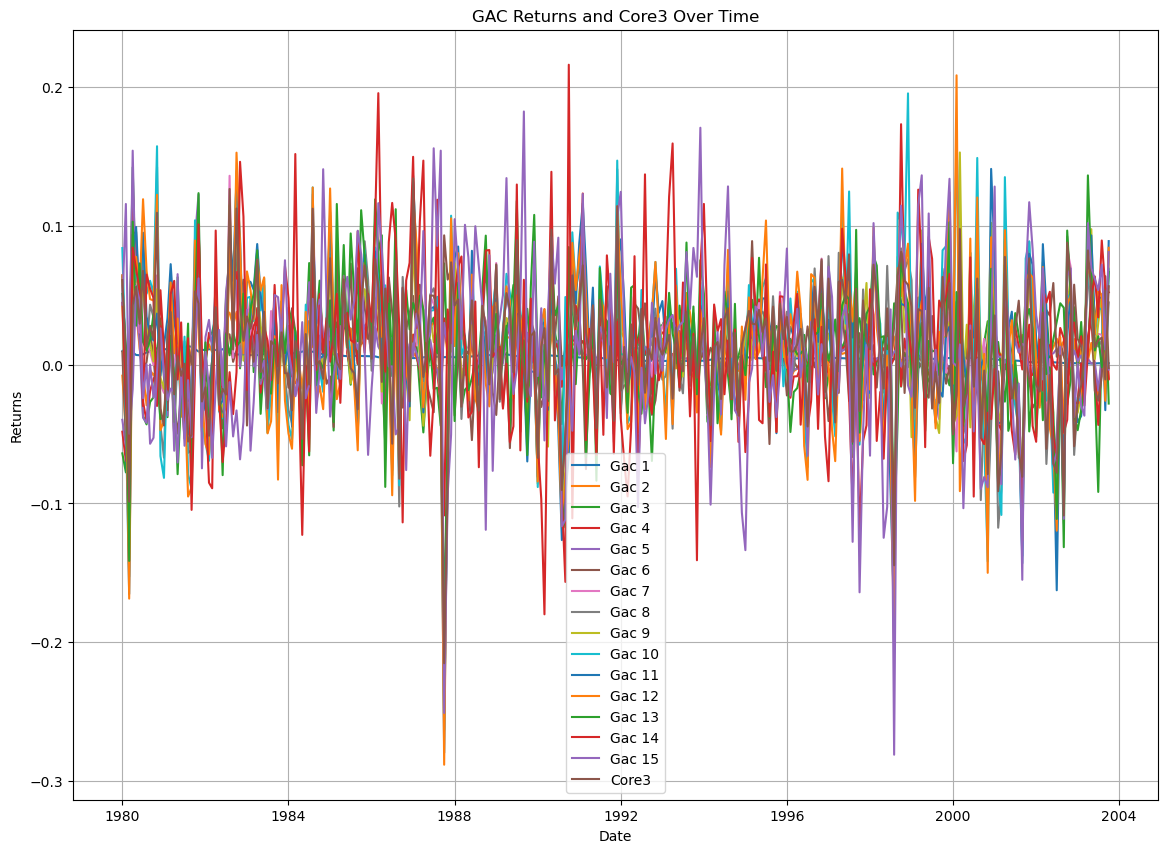

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the path to your CSV file
csv_file_path = 'Cleaned_GACs.csv'  # Update this to the path of your CSV file

# Read the CSV file
df = pd.read_csv(csv_file_path)

# Display the DataFrame columns to verify the structure
print("Columns in DataFrame:")
print(df.columns)

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set 'date' as the index
df.set_index('date', inplace=True)

# Convert GAC 1-15 and Core3 to float64
gac_columns = [f'Gac {i}' for i in range(1, 16)] + ['Core3']
for column in gac_columns:
    if column in df.columns:
        df[column] = df[column].astype('float64')

# Display the DataFrame types to verify changes
print("\nDataFrame dtypes after conversion:")
print(df.dtypes)

# Optional: Plotting to visualize the GAC columns and Core3
plt.figure(figsize=(14, 10))
for column in gac_columns:
    if column in df.columns:
        plt.plot(df.index, df[column], label=column)

plt.title('GAC Returns and Core3 Over Time')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid()
plt.show()


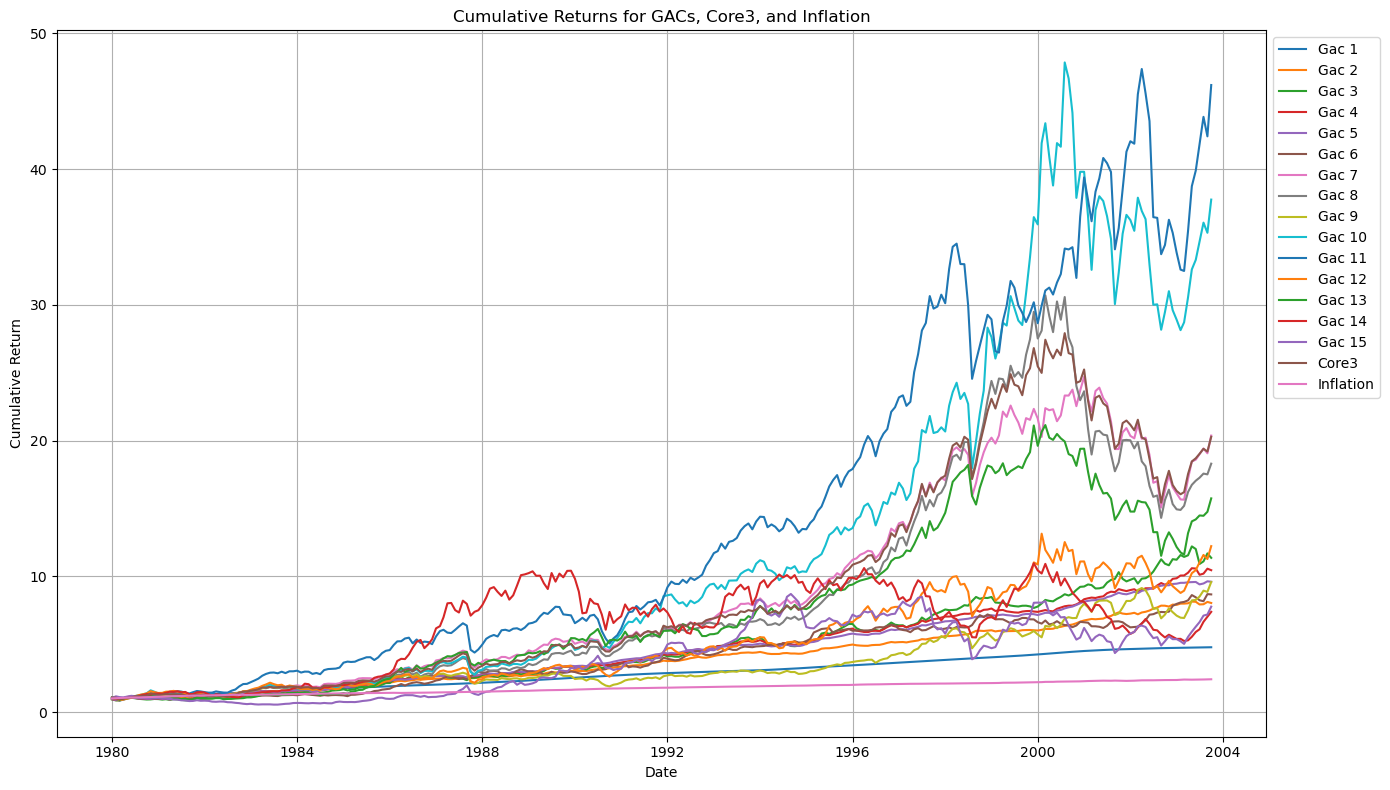

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the cleaned GACs data (assuming it's already preprocessed as described)
gacs_df = pd.read_csv('Cleaned_GACs.csv', index_col='date', parse_dates=True)

# Sort the DataFrame by date
gacs_df = gacs_df.sort_index()

# Convert returns to numeric to handle any potential invalid entries
for col in gacs_df.columns:
    gacs_df[col] = pd.to_numeric(gacs_df[col], errors='coerce')

# Filter for GAC 1 to GAC 15, Core3, and Inflation
gac_columns = [f'Gac {i}' for i in range(1, 16)] + ['Core3', 'Inflation']
gacs_filtered = gacs_df[gac_columns]

# Calculate cumulative returns
cumulative_returns = (1 + gacs_filtered).cumprod()

# Plot cumulative returns
plt.figure(figsize=(14, 8))
for col in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[col], label=col)

# Set plot title and labels
plt.title("Cumulative Returns for GACs, Core3, and Inflation")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


In [46]:
# Assuming df is your DataFrame
pd.set_option('display.max_rows', None)  # Set max rows to None to display all rows
pd.set_option('display.max_columns', None)  # Set max columns to None to display all columns

# Now print the DataFrame
print(df)

# Optional: Reset the options to defaults after printing if needed
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

               Gac 1   Gac 2   Gac 3   Gac 4   Gac 5     Gac 6     Gac 7  \
date                                                                       
2003-10-01  0.001092 -0.0098 -0.0280 -0.0105 -0.0035 -0.002333  0.068355   
2003-09-01  0.000958  0.0217  0.0529  0.0358  0.0170  0.063833 -0.018104   
2003-08-01  0.001125  0.0018  0.0175  0.0083  0.0071 -0.008464  0.021639   
2003-07-01  0.001067 -0.0243 -0.0917 -0.0434 -0.0187 -0.025887  0.022203   
2003-06-01  0.000908 -0.0016 -0.0158 -0.0023  0.0016 -0.018812  0.007310   
2003-05-01  0.000942  0.0157  0.0570  0.0324  0.0008  0.047326  0.073614   
2003-04-01  0.001017  0.0028  0.0102  0.0200  0.0042  0.014059  0.098804   
2003-03-01  0.000992  0.0002 -0.0121  0.0004  0.0001  0.005147 -0.001230   
2003-02-01  0.001033  0.0113  0.0308  0.0205  0.0067  0.013093 -0.027242   
2003-01-01  0.001092 -0.0022 -0.0034  0.0042  0.0024  0.018652 -0.027364   
2002-12-01  0.001100  0.0185  0.0415  0.0305  0.0104  0.057709 -0.051954   
2002-11-01  

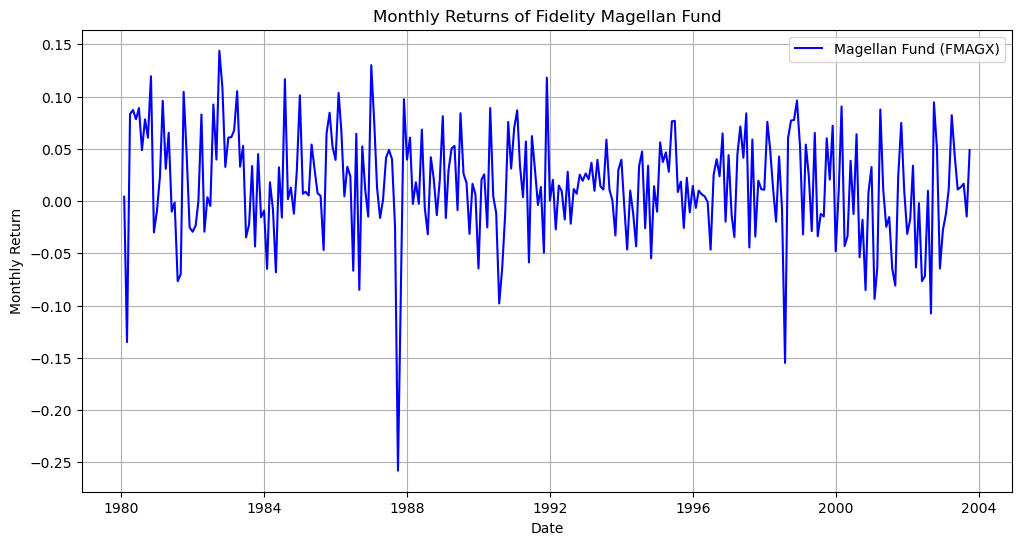

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Magellan data (make sure the file path is correct for your local environment)
magellan_data = pd.read_csv('Cleaned_FMAGX.csv', parse_dates=['date'])

# Drop any rows with missing values (if necessary)
magellan_data = magellan_data.dropna()

# Plot Magellan Fund's monthly returns
plt.figure(figsize=(12, 6))
plt.plot(magellan_data['date'], magellan_data['return'], label='Magellan Fund (FMAGX)', color='blue', linewidth=1.5)
plt.title('Monthly Returns of Fidelity Magellan Fund')
plt.xlabel('Date')
plt.ylabel('Monthly Return')
plt.legend()
plt.grid(True)
plt.show()


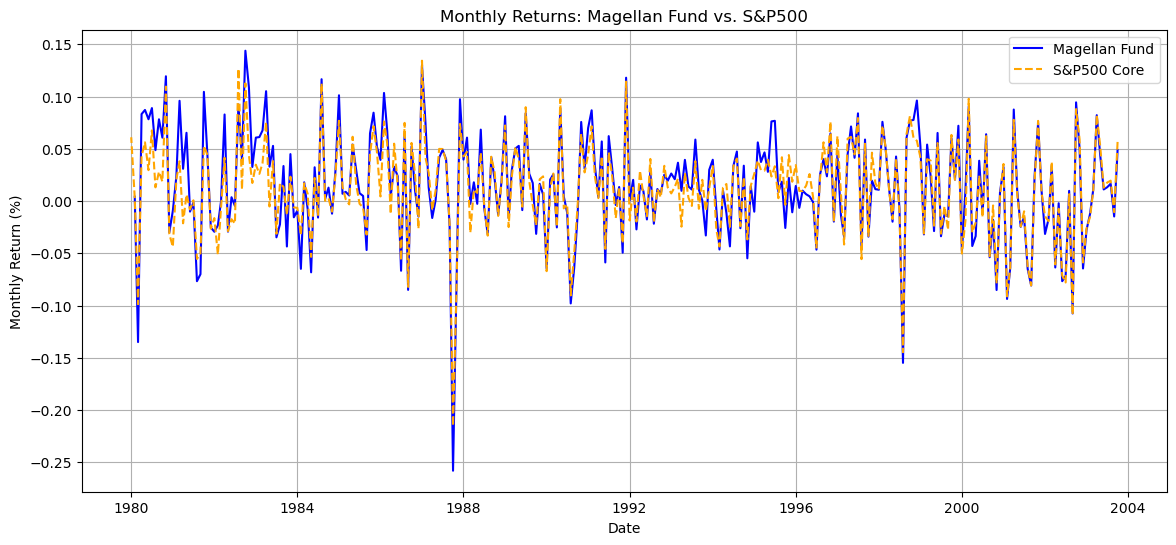

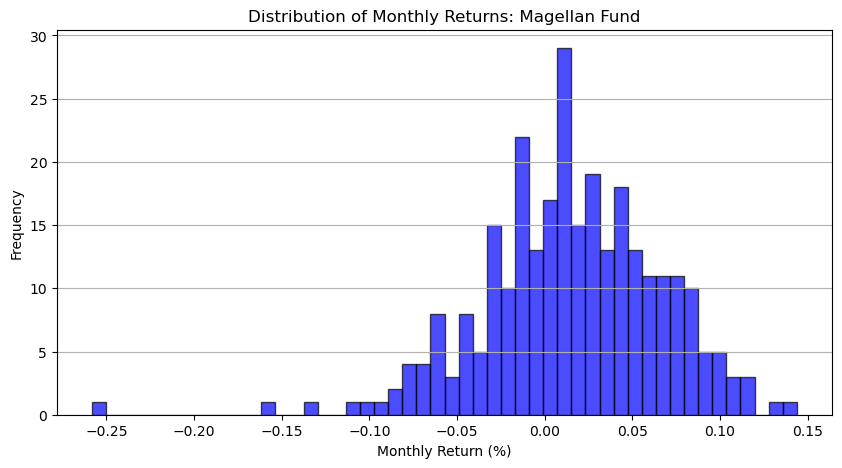

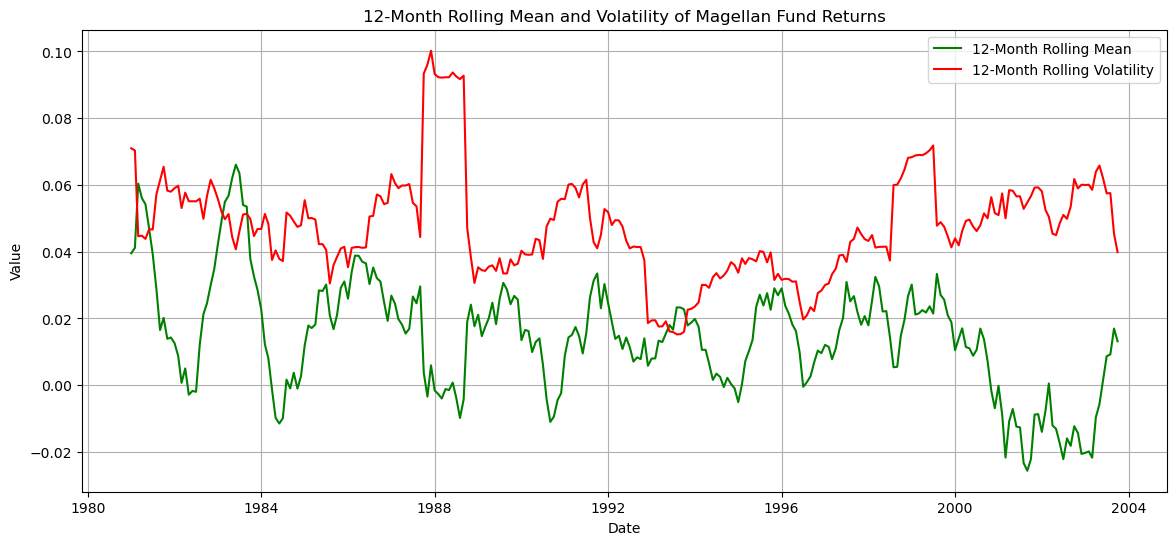

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned data
fmagx_df = pd.read_csv('Cleaned_FMAGX.csv', index_col='date', parse_dates=True)
gacs_df = pd.read_csv('Cleaned_GACs.csv', index_col='date', parse_dates=True)

# Visualize Monthly Returns of the Magellan Fund and S&P 500
plt.figure(figsize=(14, 6))
plt.plot(fmagx_df['return'], label='Magellan Fund', color='blue')
plt.plot(gacs_df['Core3'], label='S&P500 Core', color='orange', linestyle='--')
plt.title("Monthly Returns: Magellan Fund vs. S&P500")
plt.xlabel("Date")
plt.ylabel("Monthly Return (%)")
plt.legend()
plt.grid(True)
plt.show()

# Histogram of Monthly Returns for Magellan Fund
plt.figure(figsize=(10, 5))
plt.hist(fmagx_df['return'].dropna(), bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Monthly Returns: Magellan Fund")
plt.xlabel("Monthly Return (%)")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()

# Optional: Rolling Mean and Volatility (e.g., 12-month rolling window)
fmagx_df['rolling_mean'] = fmagx_df['return'].rolling(window=12).mean()
fmagx_df['rolling_vol'] = fmagx_df['return'].rolling(window=12).std()

plt.figure(figsize=(14, 6))
plt.plot(fmagx_df['rolling_mean'], label='12-Month Rolling Mean', color='green')
plt.plot(fmagx_df['rolling_vol'], label='12-Month Rolling Volatility', color='red')
plt.title("12-Month Rolling Mean and Volatility of Magellan Fund Returns")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


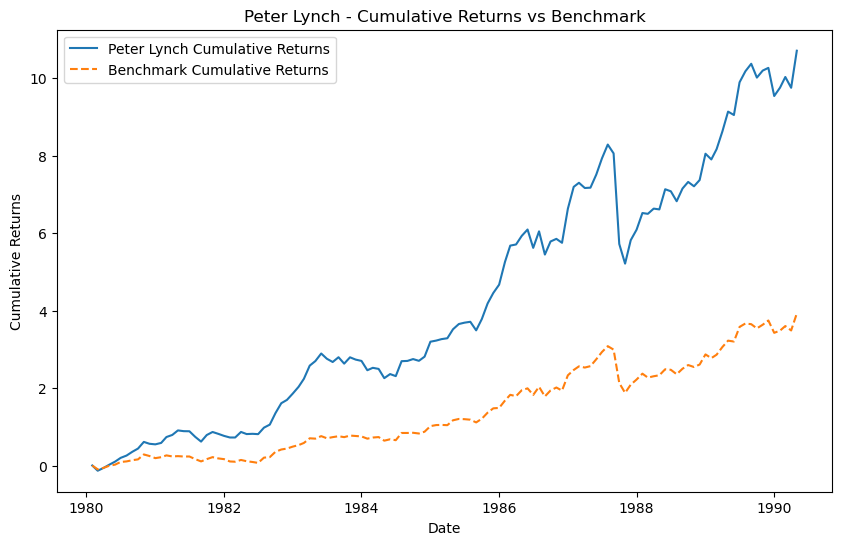

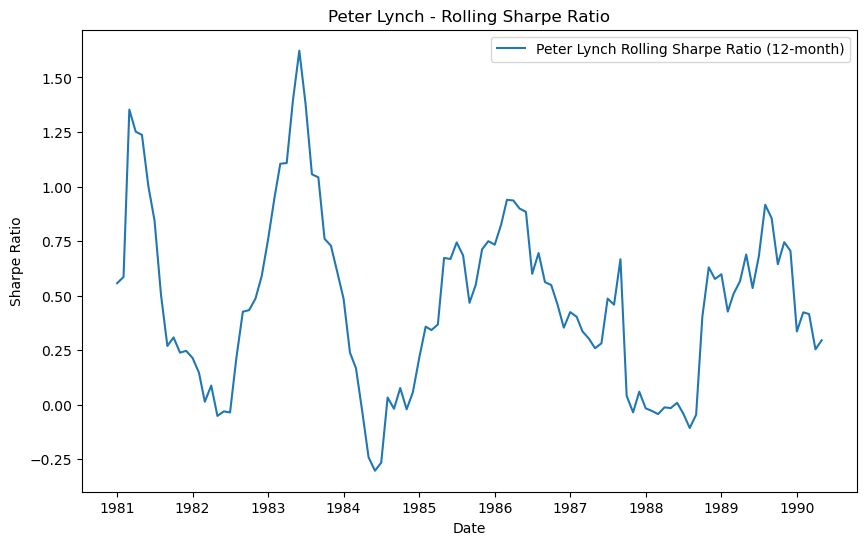

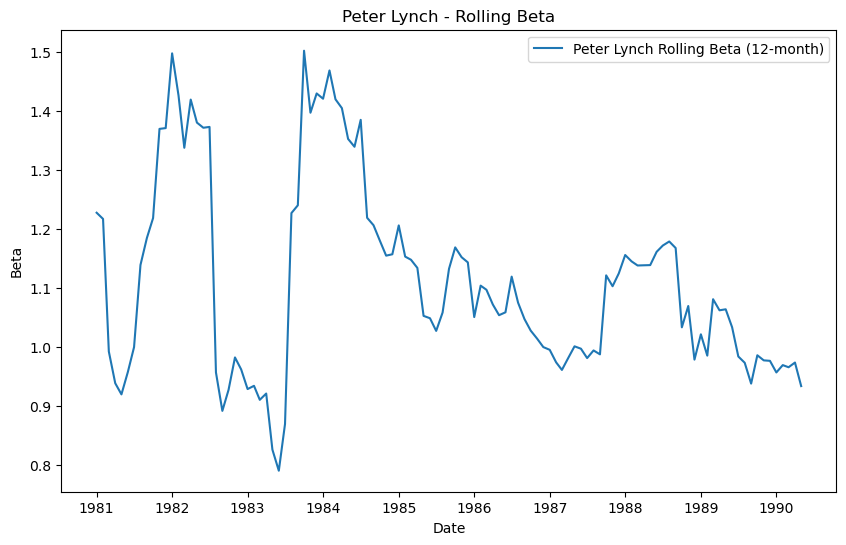

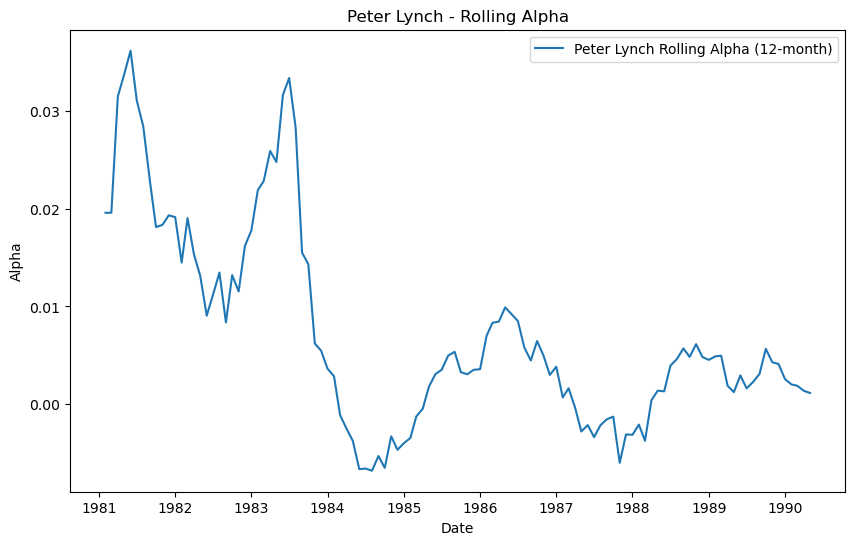

Peter Lynch metrics:
mean_return: 0.0217
volatility: 0.0568
sharpe_ratio: 0.1337
alpha: 1.1120
beta: 0.0060
utility: 0.0168




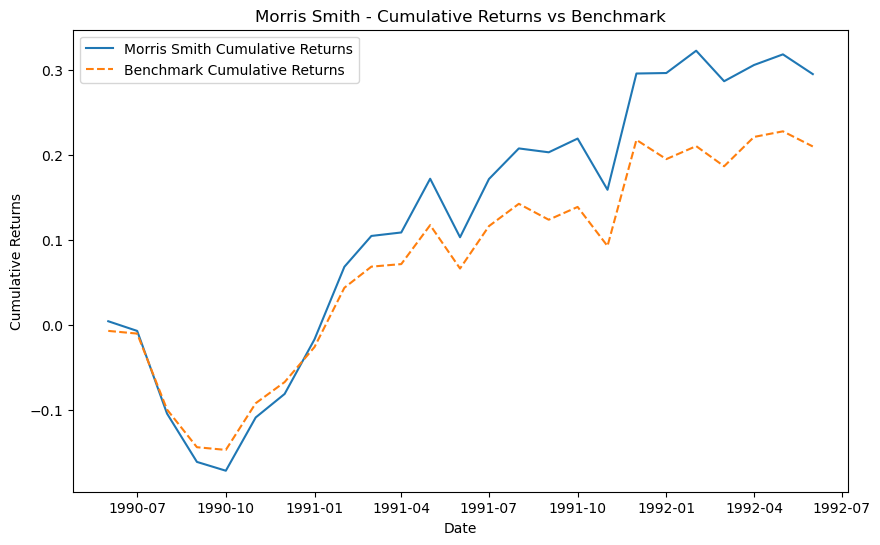

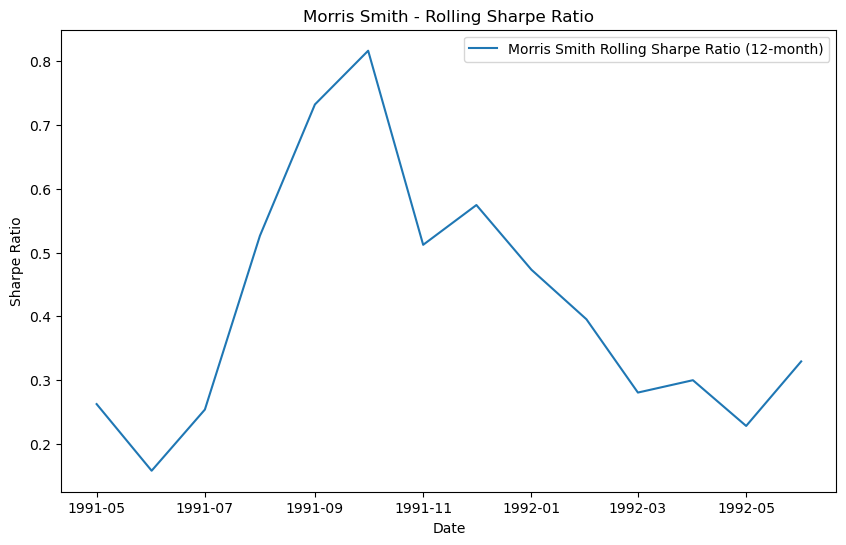

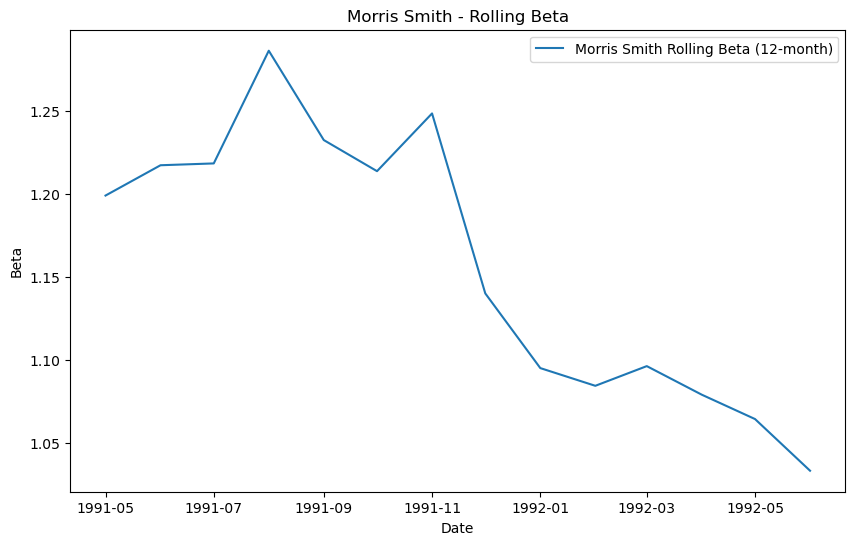

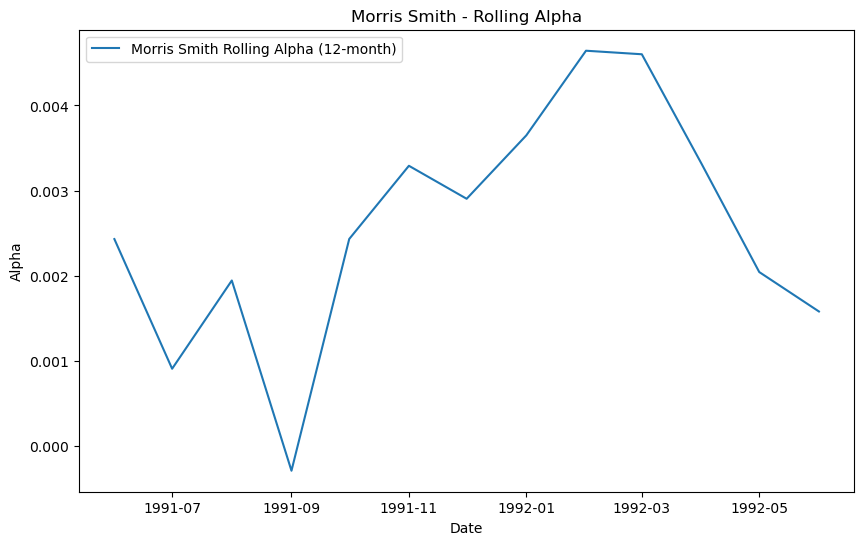

Morris Smith metrics:
mean_return: 0.0116
volatility: 0.0503
sharpe_ratio: 0.0607
alpha: 1.1380
beta: 0.0019
utility: 0.0078




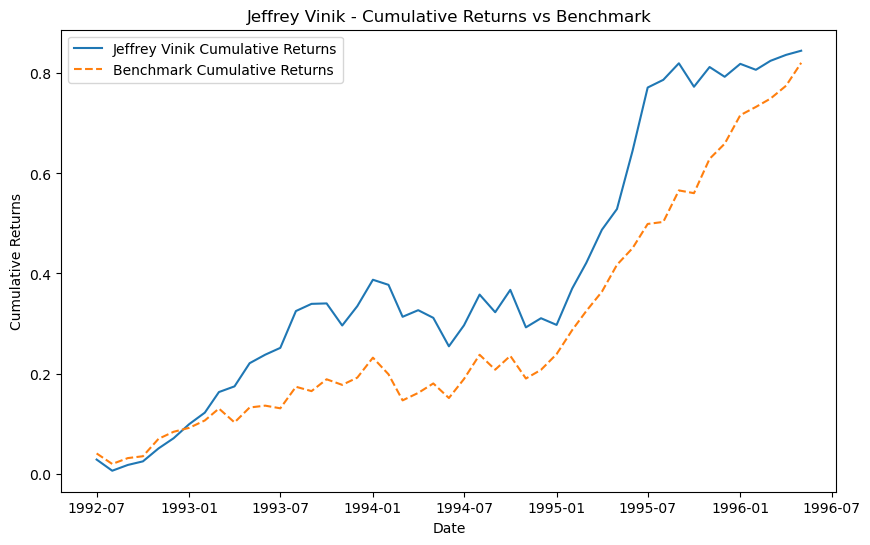

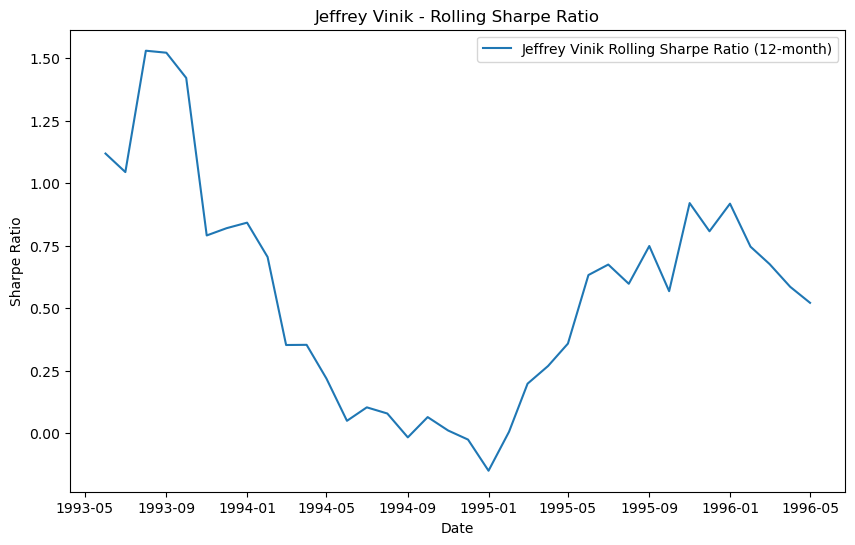

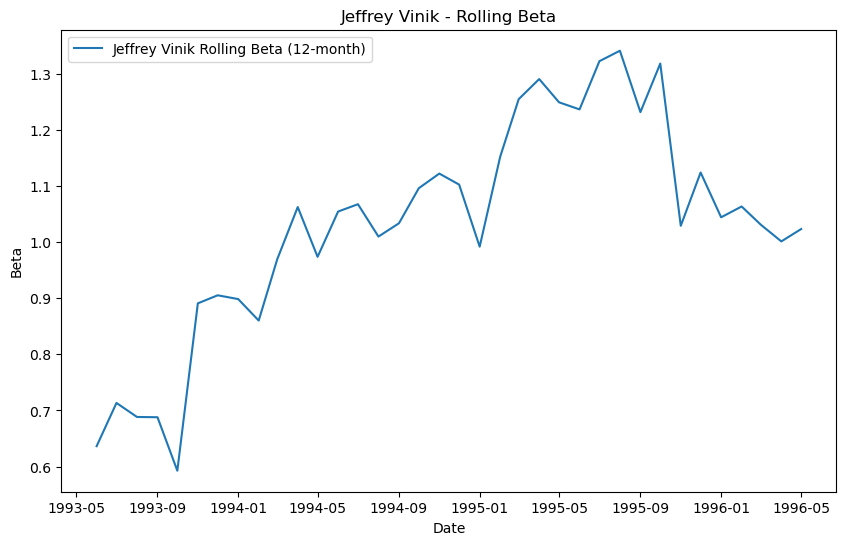

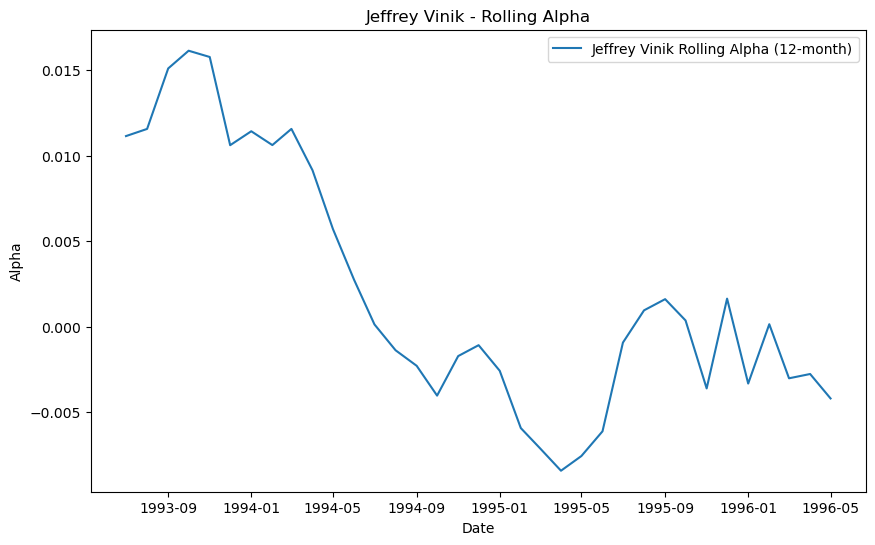

Jeffrey Vinik metrics:
mean_return: 0.0135
volatility: 0.0293
sharpe_ratio: 0.0155
alpha: 0.9823
beta: 0.0007
utility: 0.0122




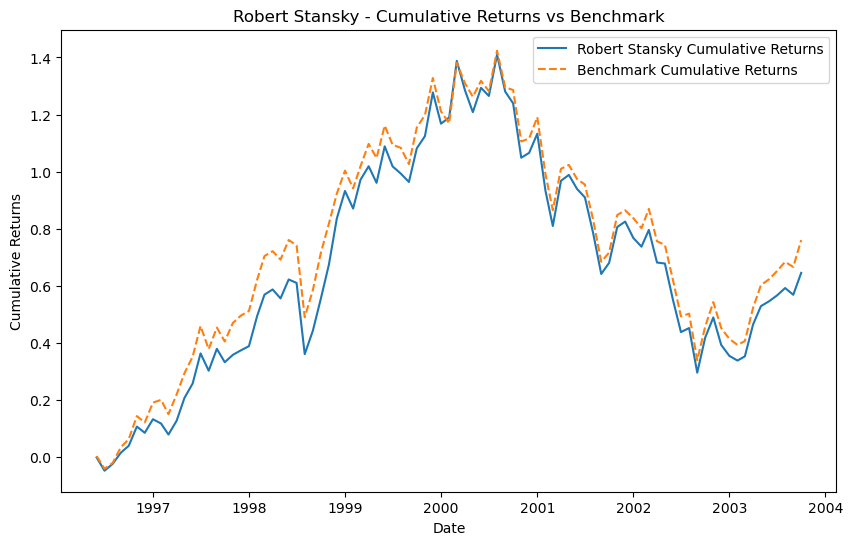

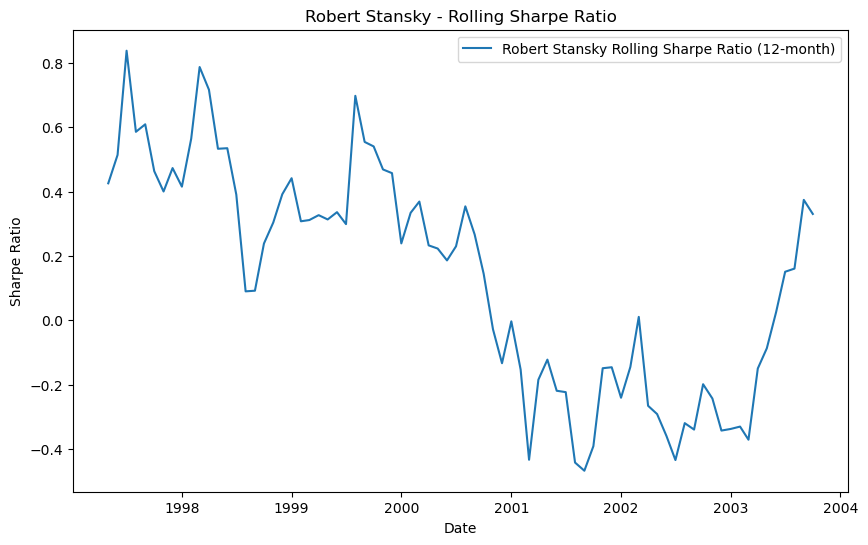

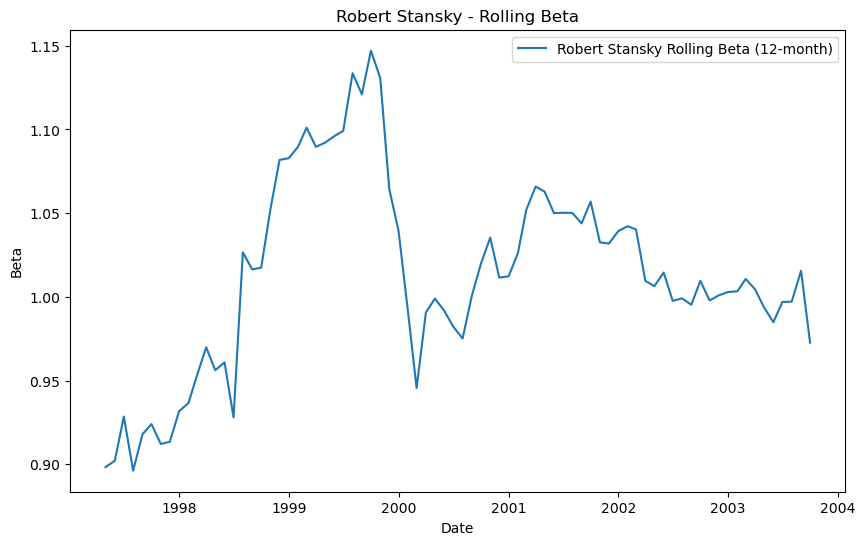

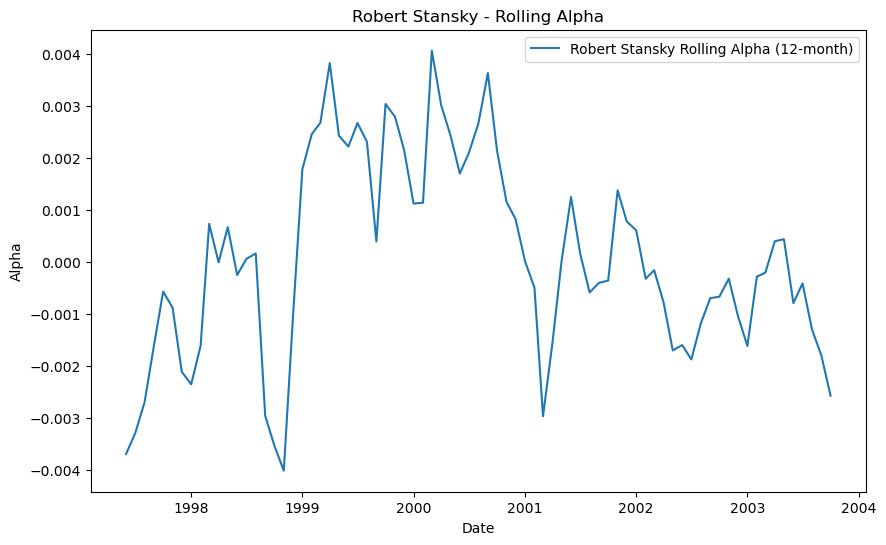

Robert Stansky metrics:
mean_return: 0.0070
volatility: 0.0524
sharpe_ratio: -0.0132
alpha: 1.0094
beta: -0.0008
utility: 0.0029




In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Sort dataframes by date (assuming `fmagx_df` and `gacs_df` are already cleaned and sorted)
fmagx_df = fmagx_df.sort_index()
gacs_df = gacs_df.sort_index()

# Define manager periods
manager_periods = {
    'Peter Lynch': ('1980-02-01', '1990-05-01'),
    'Morris Smith': ('1990-06-01', '1992-06-01'),
    'Jeffrey Vinik': ('1992-07-01', '1996-05-01'),
    'Robert Stansky': ('1996-06-01', '2003-10-01')
}

# Benchmark returns (Core3 from GACs)
benchmark_returns = gacs_df['Core3']

# Analysis Functions
def calculate_metrics(returns, benchmark):
    metrics = {}
    excess_returns = returns - benchmark.mean()
    
    # Mean return and volatility
    metrics['mean_return'] = returns.mean()
    metrics['volatility'] = returns.std()
    
    # Sharpe ratio
    metrics['sharpe_ratio'] = excess_returns.mean() / returns.std()
    
    # Alpha and beta
    metrics['alpha'], metrics['beta'] = stats.linregress(benchmark, returns)[:2]
    
    # Utility function with a risk aversion coefficient (assumed 3 here)
    risk_aversion = 3
    metrics['utility'] = returns.mean() - 0.5 * risk_aversion * returns.var()
    
    return metrics

# Rolling regression function to calculate rolling alpha and beta
def rolling_alpha_beta(returns, benchmark, window=12):
    rolling_alpha = []
    rolling_beta = []
    
    for i in range(window, len(returns)):
        y = returns[i-window:i]
        x = benchmark[i-window:i]
        if len(x) > 1:  # Ensure there is enough data
            beta, alpha, _, _, _ = stats.linregress(x, y)
            rolling_alpha.append(alpha)
            rolling_beta.append(beta)
        else:
            rolling_alpha.append(np.nan)
            rolling_beta.append(np.nan)
    
    # Pad with NaNs for alignment with original index
    return pd.Series(rolling_alpha, index=returns.index[window:]), pd.Series(rolling_beta, index=returns.index[window:])

# Calculate and visualize metrics for each manager
manager_metrics = {}
for manager, period in manager_periods.items():
    start, end = period
    returns = fmagx_df.loc[start:end, 'return']
    benchmark = benchmark_returns.loc[start:end]
    metrics = calculate_metrics(returns, benchmark)
    manager_metrics[manager] = metrics

    # Cumulative returns
    cumulative_returns = (1 + returns).cumprod() - 1
    cumulative_benchmark = (1 + benchmark).cumprod() - 1

    # Plot cumulative returns
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_returns, label=f"{manager} Cumulative Returns")
    plt.plot(cumulative_benchmark, label="Benchmark Cumulative Returns", linestyle="--")
    plt.title(f"{manager} - Cumulative Returns vs Benchmark")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Returns")
    plt.legend()
    plt.show()
    
    # Plot rolling Sharpe ratio
    rolling_sharpe = (returns.rolling(window=12).mean() / returns.rolling(window=12).std()).dropna()
    plt.figure(figsize=(10, 6))
    plt.plot(rolling_sharpe, label=f"{manager} Rolling Sharpe Ratio (12-month)")
    plt.title(f"{manager} - Rolling Sharpe Ratio")
    plt.xlabel("Date")
    plt.ylabel("Sharpe Ratio")
    plt.legend()
    plt.show()

    # Plot rolling beta
    rolling_beta = returns.rolling(window=12).cov(benchmark) / benchmark.rolling(window=12).var()
    plt.figure(figsize=(10, 6))
    plt.plot(rolling_beta, label=f"{manager} Rolling Beta (12-month)")
    plt.title(f"{manager} - Rolling Beta")
    plt.xlabel("Date")
    plt.ylabel("Beta")
    plt.legend()
    plt.show()

    # Calculate and plot rolling alpha
    rolling_alpha, rolling_beta = rolling_alpha_beta(returns, benchmark, window=12)
    plt.figure(figsize=(10, 6))
    plt.plot(rolling_alpha, label=f"{manager} Rolling Alpha (12-month)")
    plt.title(f"{manager} - Rolling Alpha")
    plt.xlabel("Date")
    plt.ylabel("Alpha")
    plt.legend()
    plt.show()

    # Print metrics
    print(f"{manager} metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("\n")


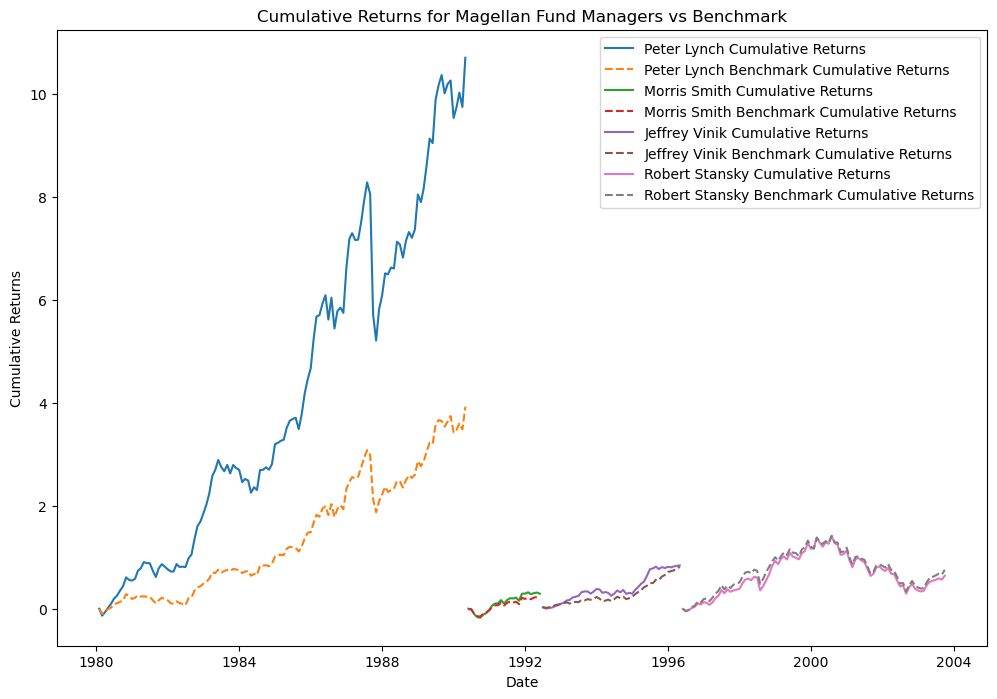

In [54]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt

# Initialize an empty dictionary to store cumulative returns for each manager and the benchmark
manager_cumulative_returns = {}
benchmark_cumulative_returns = {}

# Loop through each manager and period to calculate cumulative returns
for manager, period in manager_periods.items():
    start, end = period
    # Manager's returns
    manager_returns = fmagx_df.loc[start:end, 'return']
    # Benchmark's returns over the same period
    benchmark_returns = gacs_df['Core3'].loc[start:end]
    
    # Calculate cumulative returns for manager and benchmark
    manager_cumulative = (1 + manager_returns).cumprod() - 1
    benchmark_cumulative = (1 + benchmark_returns).cumprod() - 1
    
    # Store the results for later plotting
    manager_cumulative_returns[manager] = manager_cumulative
    benchmark_cumulative_returns[manager] = benchmark_cumulative

# Plot cumulative returns for each manager vs benchmark
plt.figure(figsize=(12, 8))

for manager in manager_cumulative_returns:
    plt.plot(manager_cumulative_returns[manager], label=f"{manager} Cumulative Returns")
    plt.plot(benchmark_cumulative_returns[manager], linestyle='--', label=f"{manager} Benchmark Cumulative Returns")

plt.title("Cumulative Returns for Magellan Fund Managers vs Benchmark")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()


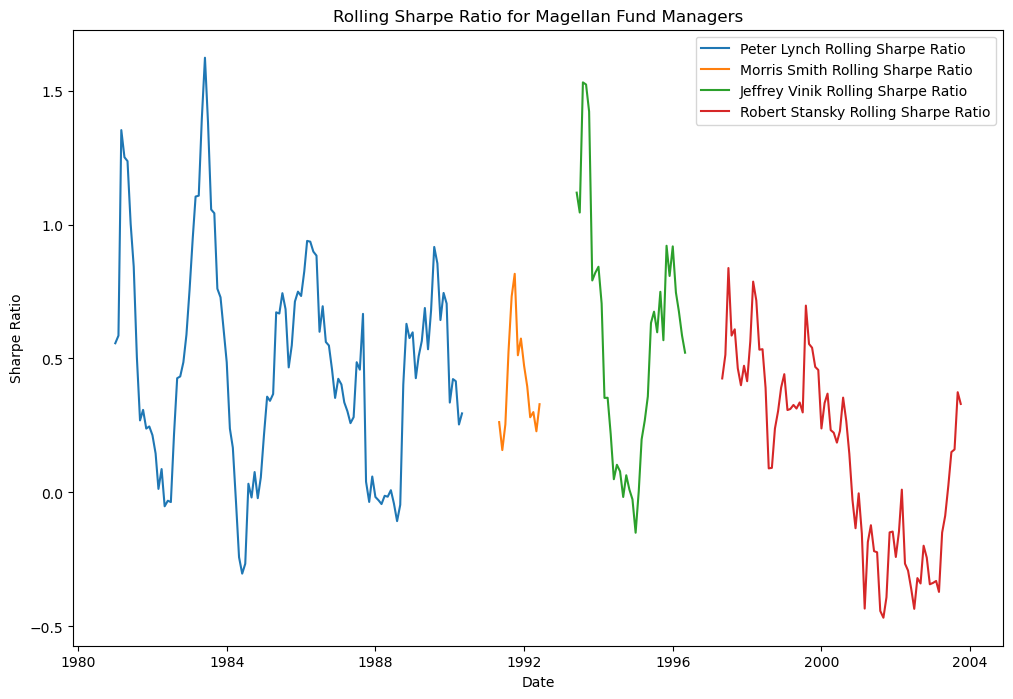

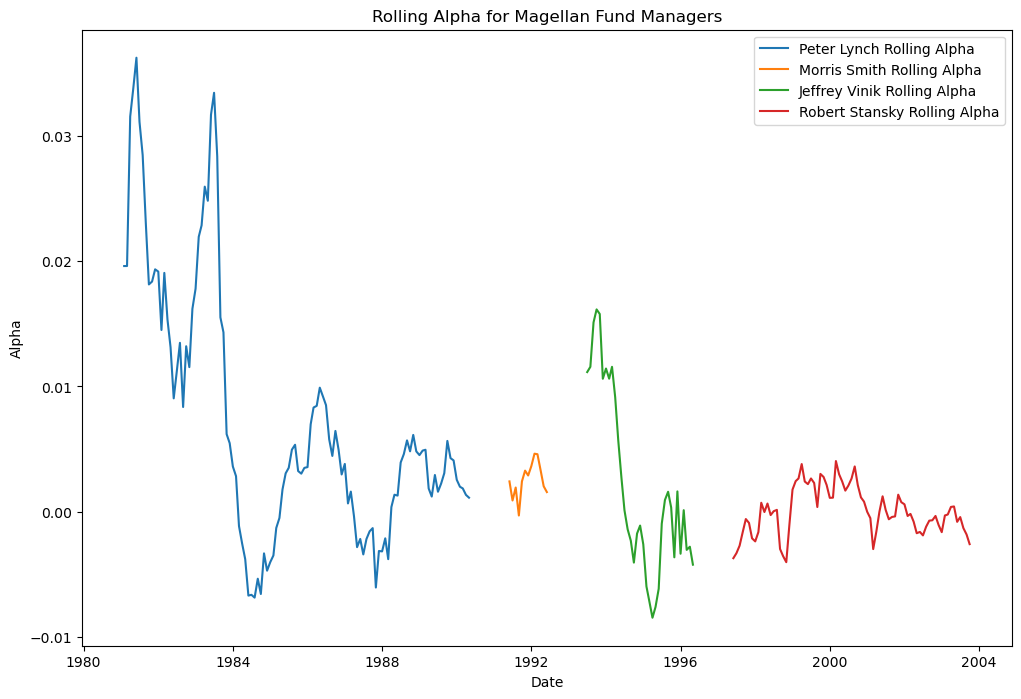

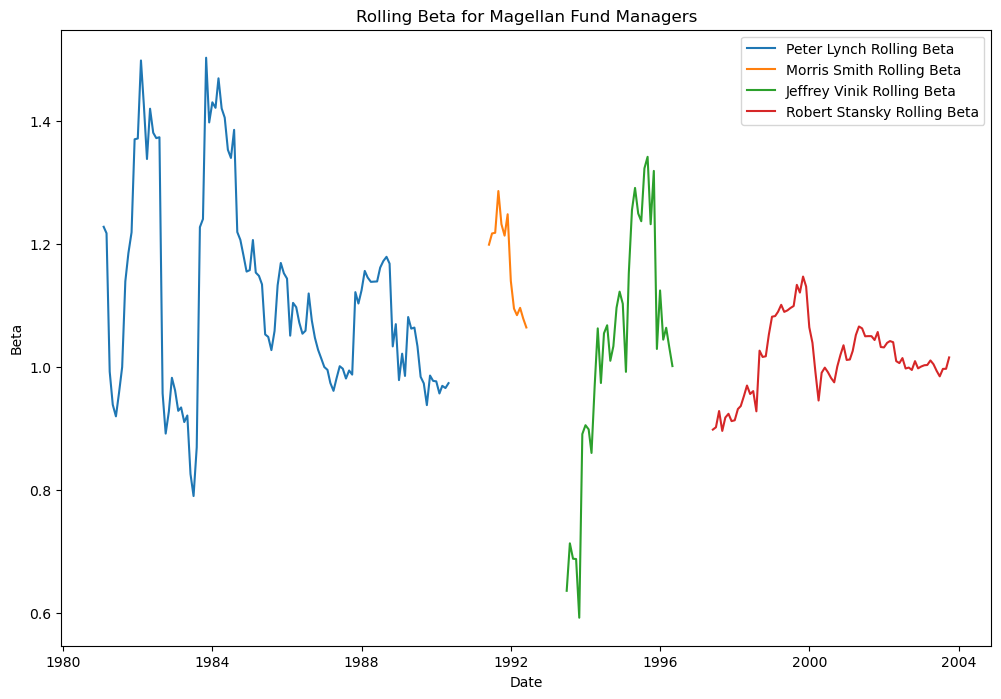

In [51]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt

# Define manager periods as per previous code
manager_periods = {
    'Peter Lynch': ('1980-02-01', '1990-05-01'),
    'Morris Smith': ('1990-06-01', '1992-06-01'),
    'Jeffrey Vinik': ('1992-07-01', '1996-05-01'),
    'Robert Stansky': ('1996-06-01', '2003-10-01')
}

# Calculate rolling Sharpe ratio, rolling alpha, and rolling beta for each manager
rolling_sharpe_data = {}
rolling_alpha_data = {}
rolling_beta_data = {}

for manager, period in manager_periods.items():
    start, end = period
    returns = fmagx_df.loc[start:end, 'return']
    benchmark = gacs_df['Core3'].loc[start:end]
    
    # Calculate rolling Sharpe ratio with a 12-month rolling window
    rolling_sharpe = (returns.rolling(window=12).mean() / returns.rolling(window=12).std()).dropna()
    rolling_sharpe_data[manager] = rolling_sharpe

    # Calculate rolling alpha and beta with a 12-month rolling window
    rolling_alpha, rolling_beta = rolling_alpha_beta(returns, benchmark, window=12)
    rolling_alpha_data[manager] = rolling_alpha
    rolling_beta_data[manager] = rolling_beta

# Plot Rolling Sharpe Ratios
plt.figure(figsize=(12, 8))
for manager, sharpe in rolling_sharpe_data.items():
    plt.plot(sharpe, label=f"{manager} Rolling Sharpe Ratio")
plt.title("Rolling Sharpe Ratio for Magellan Fund Managers")
plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.legend()
plt.show()

# Plot Rolling Alpha
plt.figure(figsize=(12, 8))
for manager, alpha in rolling_alpha_data.items():
    plt.plot(alpha, label=f"{manager} Rolling Alpha")
plt.title("Rolling Alpha for Magellan Fund Managers")
plt.xlabel("Date")
plt.ylabel("Alpha")
plt.legend()
plt.show()

# Plot Rolling Beta
plt.figure(figsize=(12, 8))
for manager, beta in rolling_beta_data.items():
    plt.plot(beta, label=f"{manager} Rolling Beta")
plt.title("Rolling Beta for Magellan Fund Managers")
plt.xlabel("Date")
plt.ylabel("Beta")
plt.legend()
plt.show()


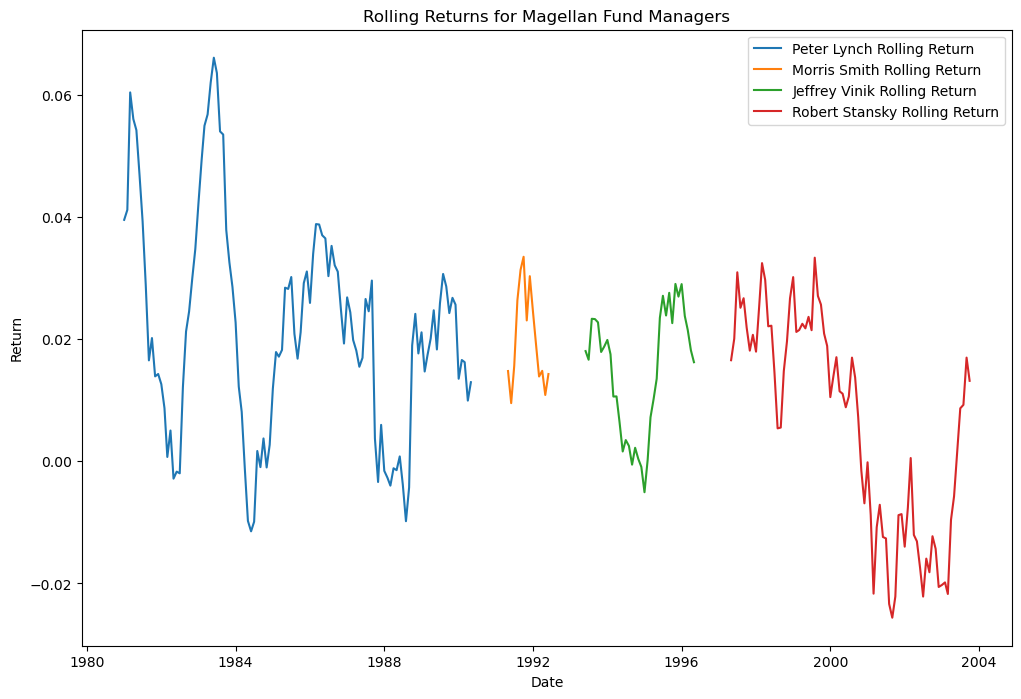

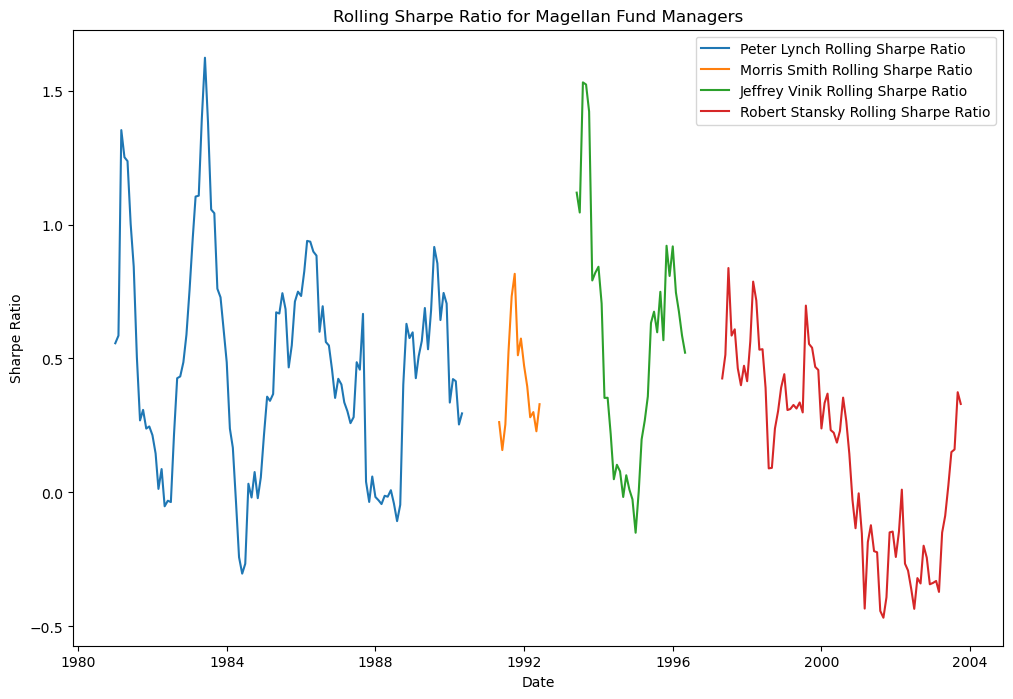

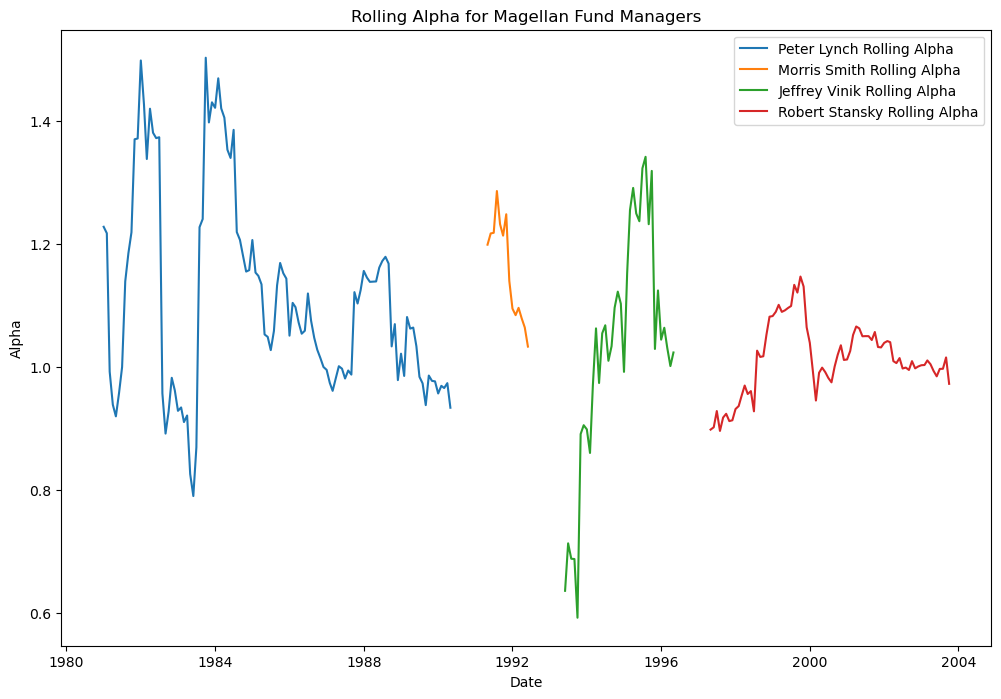

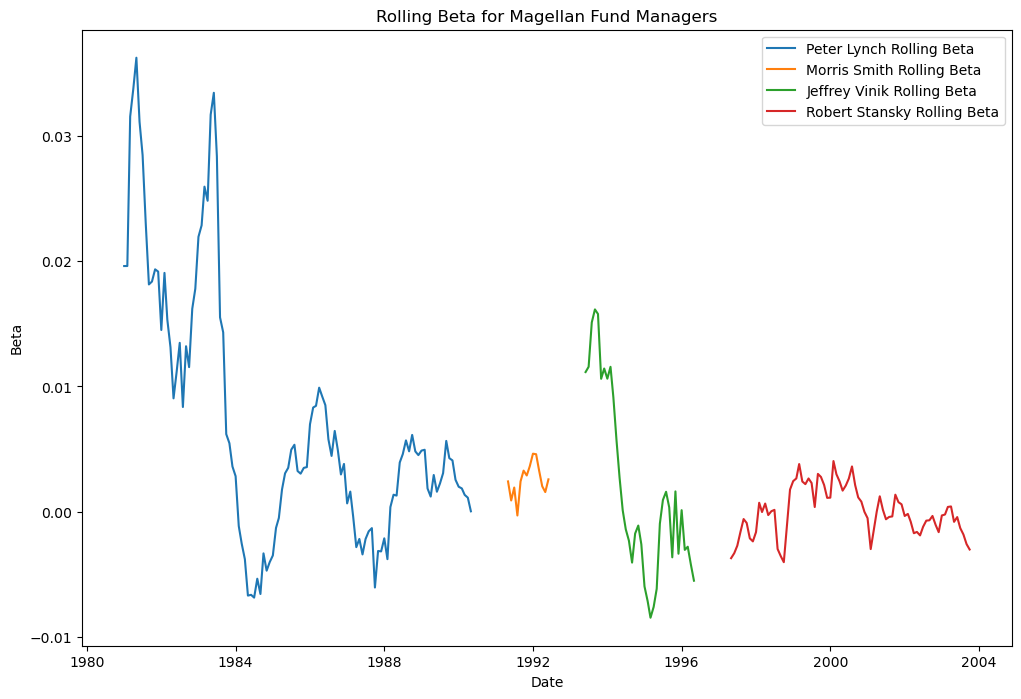

In [53]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt

# Define manager periods as per previous code
manager_periods = {
    'Peter Lynch': ('1980-02-01', '1990-05-01'),
    'Morris Smith': ('1990-06-01', '1992-06-01'),
    'Jeffrey Vinik': ('1992-07-01', '1996-05-01'),
    'Robert Stansky': ('1996-06-01', '2003-10-01')
}

# Dictionary to store rolling data
rolling_sharpe_data = {}
rolling_alpha_data = {}
rolling_beta_data = {}
rolling_return_data = {}

for manager, period in manager_periods.items():
    start, end = period
    returns = fmagx_df.loc[start:end, 'return']
    benchmark = gacs_df['Core3'].loc[start:end]
    
    # Calculate rolling Sharpe ratio with a 12-month rolling window
    rolling_sharpe = (returns.rolling(window=12).mean() / returns.rolling(window=12).std()).dropna()
    rolling_sharpe_data[manager] = rolling_sharpe

    # Calculate rolling alpha and beta with a 12-month rolling window
    rolling_alpha, rolling_beta = rolling_alpha_beta(returns, benchmark, window=12)
    rolling_alpha_data[manager] = rolling_alpha
    rolling_beta_data[manager] = rolling_beta
    
    # Calculate rolling returns with a 12-month rolling window
    rolling_return = returns.rolling(window=12).mean().dropna()
    rolling_return_data[manager] = rolling_return

# Plot Rolling Returns
plt.figure(figsize=(12, 8))
for manager, rolling_return in rolling_return_data.items():
    plt.plot(rolling_return, label=f"{manager} Rolling Return")
plt.title("Rolling Returns for Magellan Fund Managers")
plt.xlabel("Date")
plt.ylabel("Return")
plt.legend()
plt.show()

# Plot Rolling Sharpe Ratios
plt.figure(figsize=(12, 8))
for manager, sharpe in rolling_sharpe_data.items():
    plt.plot(sharpe, label=f"{manager} Rolling Sharpe Ratio")
plt.title("Rolling Sharpe Ratio for Magellan Fund Managers")
plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.legend()
plt.show()

# Plot Rolling Alpha
plt.figure(figsize=(12, 8))
for manager, alpha in rolling_alpha_data.items():
    plt.plot(alpha, label=f"{manager} Rolling Alpha")
plt.title("Rolling Alpha for Magellan Fund Managers")
plt.xlabel("Date")
plt.ylabel("Alpha")
plt.legend()
plt.show()

# Plot Rolling Beta
plt.figure(figsize=(12, 8))
for manager, beta in rolling_beta_data.items():
    plt.plot(beta, label=f"{manager} Rolling Beta")
plt.title("Rolling Beta for Magellan Fund Managers")
plt.xlabel("Date")
plt.ylabel("Beta")
plt.legend()
plt.show()


In [56]:
print("FMagX Dates:")
print(fmagx_df.index)
print("\nBenchmark Dates:")
print(benchmark_returns.index)


FMagX Dates:
DatetimeIndex(['1980-02-01', '1980-03-01', '1980-04-01', '1980-05-01',
               '1980-06-01', '1980-07-01', '1980-08-01', '1980-09-01',
               '1980-10-01', '1980-11-01',
               ...
               '2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01'],
              dtype='datetime64[ns]', name='date', length=285, freq=None)

Benchmark Dates:
DatetimeIndex(['2003-10-01', '2003-09-01', '2003-08-01', '2003-07-01',
               '2003-06-01', '2003-05-01', '2003-04-01', '2003-03-01',
               '2003-02-01', '2003-01-01',
               ...
               '1980-10-01', '1980-09-01', '1980-08-01', '1980-07-01',
               '1980-06-01', '1980-05-01', '1980-04-01', '1980-03-01',
               '1980-02-01', '1980-01-01'],
              dtype='datetime64[ns]', name='date', length=286, freq=None)


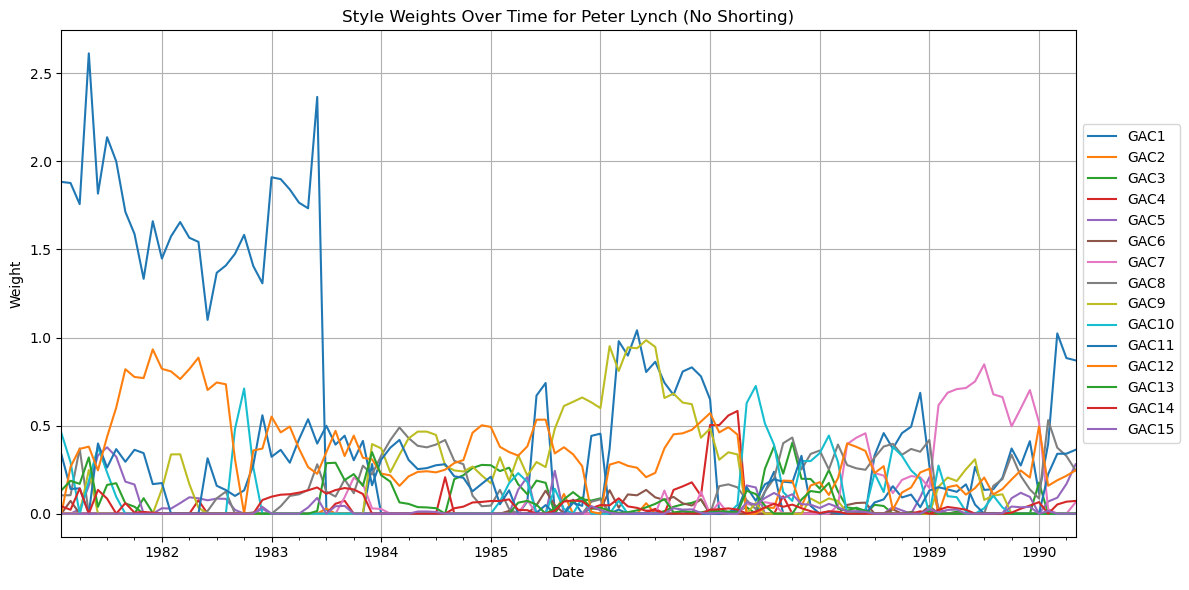

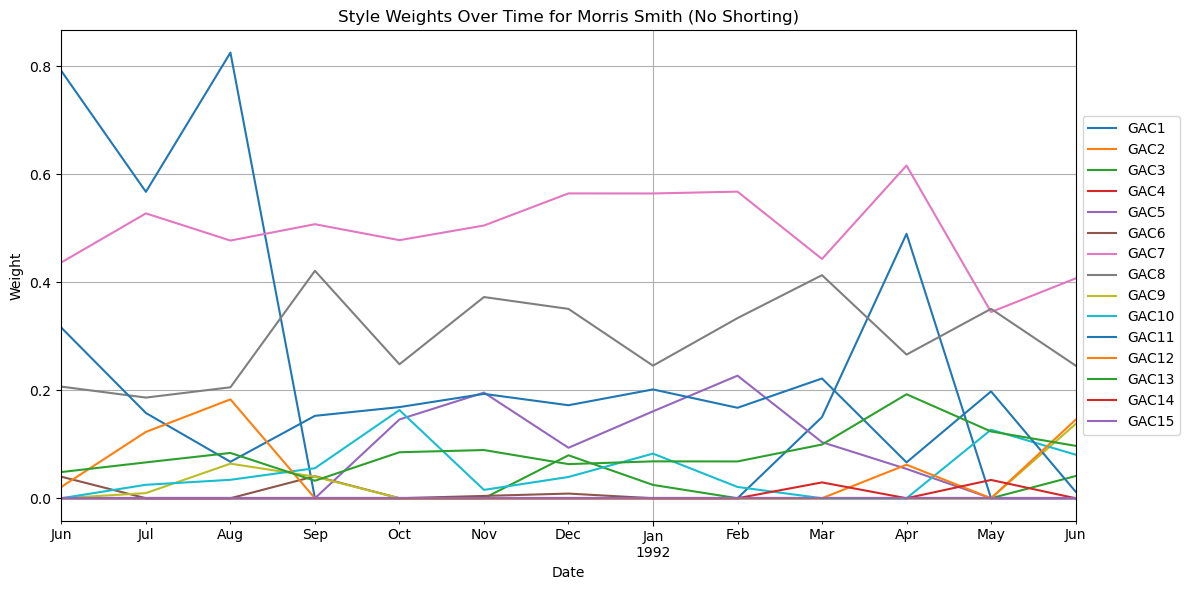

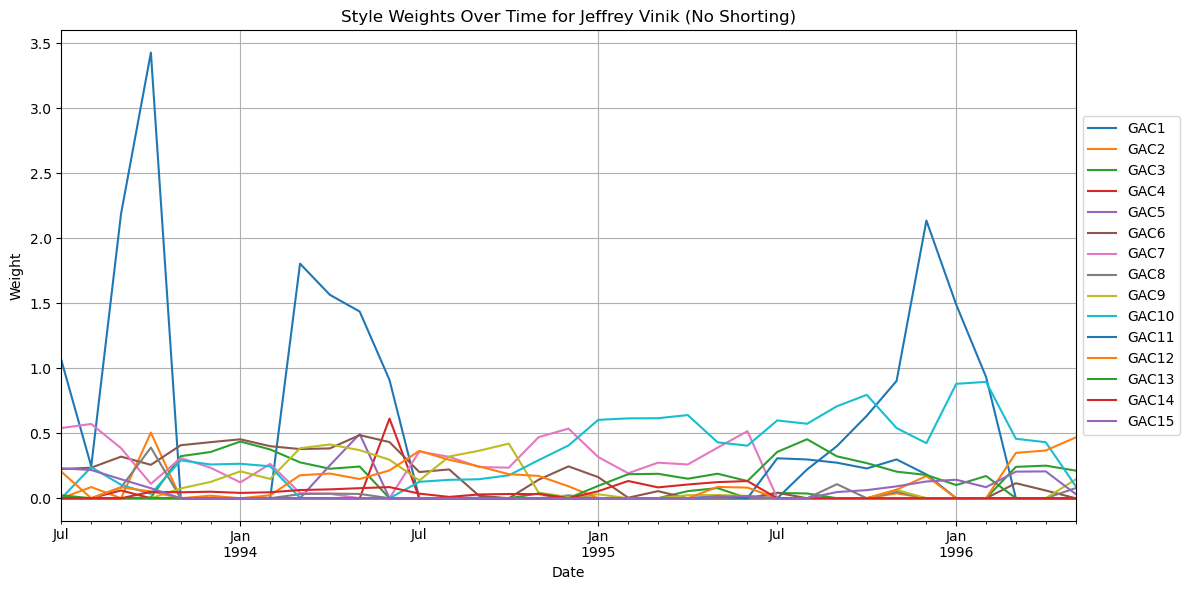

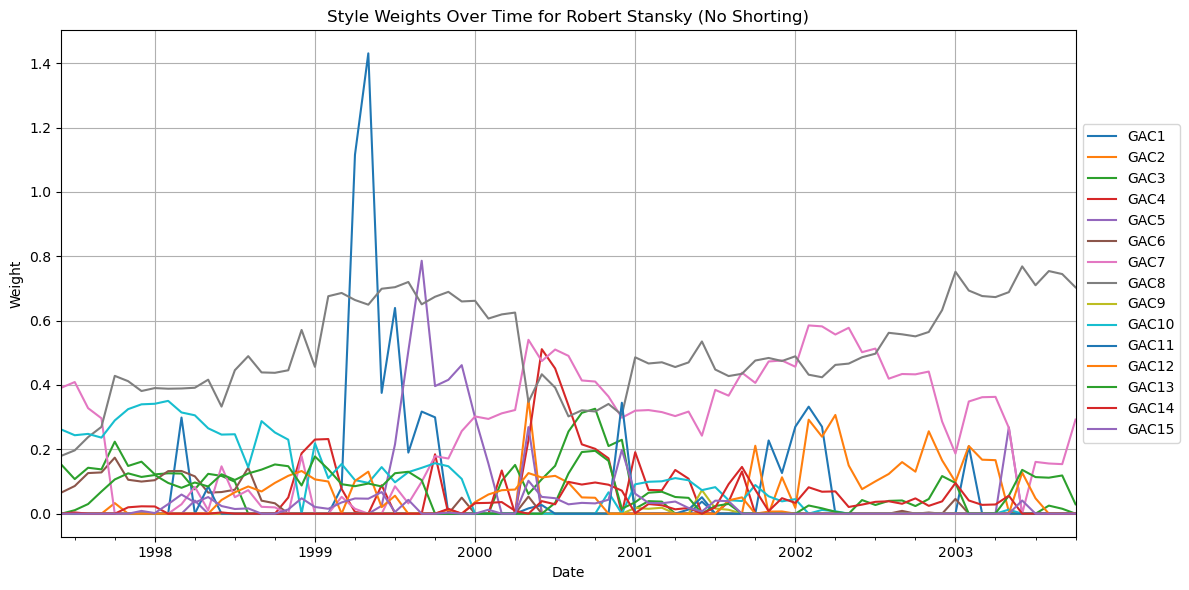

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import nnls  # Non-negative least squares

# Load cleaned data
fmagx_df = pd.read_csv('Cleaned_FMAGX.csv', index_col='date', parse_dates=True)
gacs_df = pd.read_csv('Cleaned_GACs.csv', index_col='date', parse_dates=True)

# Sort indices to ensure date-based slicing works
fmagx_df = fmagx_df.sort_index()
gacs_df = gacs_df.sort_index()

# Convert returns to numeric to handle any invalid values
fmagx_df['return'] = pd.to_numeric(fmagx_df['return'], errors='coerce')
for i in range(1, 16):
    gacs_df[f'Gac {i}'] = pd.to_numeric(gacs_df[f'Gac {i}'], errors='coerce')

# Define the periods for each manager
manager_periods = {
    'Peter Lynch': ('1977-05', '1990-05'),
    'Morris Smith': ('1990-06', '1992-06'),
    'Jeffrey Vinik': ('1992-07', '1996-05'),
    'Robert Stansky': ('1996-06', '2003-10')
}

# Set window size (e.g., 12 months for rolling analysis)
window_size = 12

# Initialize a dictionary to store weights
manager_weights = {}

for manager, (start, end) in manager_periods.items():
    # Filter data for each manager's period
    magellan_returns = fmagx_df[start:end]
    gac_returns = gacs_df[start:end].dropna()  # Ensure no NaNs for regression
    
    # Align dates between the two
    data = magellan_returns.join(gac_returns, how='inner')
    
    # Prepare results storage for rolling weights
    rolling_weights = pd.DataFrame(index=data.index, columns=[f'GAC{i}' for i in range(1, 16)])
    
    # Rolling regression for each window
    for i in range(window_size, len(data)):
        # Define the window of returns data
        window_data = data.iloc[i - window_size:i]
        y = window_data['return'].values  # Dependent variable as a numpy array
        X = window_data[[f'Gac {j}' for j in range(1, 16)]].values  # Independent variables as numpy array
        
        # Constrain regression to non-negative weights using nnls (non-negative least squares)
        weights, _ = nnls(X, y)
        
        # Store the non-negative weights
        rolling_weights.iloc[i] = weights
    
    # Store rolling weights in the dictionary for each manager
    manager_weights[manager] = rolling_weights.dropna()

# Plot the weights for each manager to visualize style changes
for manager, weights_df in manager_weights.items():
    weights_df.plot(figsize=(12, 6), title=f'Style Weights Over Time for {manager} (No Shorting)')
    plt.xlabel("Date")
    plt.ylabel("Weight")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load cleaned data for FMAGX and GACs
fmagx_df = pd.read_csv('Cleaned_FMAGX.csv', index_col='date', parse_dates=True)
gacs_df = pd.read_csv('Cleaned_GACs.csv', index_col='date', parse_dates=True)

# Sort indices to ensure proper alignment
fmagx_df = fmagx_df.sort_index()
gacs_df = gacs_df.sort_index()

# Convert returns to numeric
fmagx_df['return'] = pd.to_numeric(fmagx_df['return'], errors='coerce')
for i in range(1, 16):
    gacs_df[f'Gac {i}'] = pd.to_numeric(gacs_df[f'Gac {i}'], errors='coerce')

# Define manager periods
manager_periods = {
    'Peter Lynch': ('1977-05', '1990-05'),
    'Morris Smith': ('1990-06', '1992-06'),
    'Jeffrey Vinik': ('1992-07', '1996-05'),
    'Robert Stansky': ('1996-06', '2003-10')
}

# Set window size for rolling calculations (e.g., 12 months)
window_size = 12

# Initialize storage for results
manager_rolling_metrics = {}

for manager, (start, end) in manager_periods.items():
    # Filter data for the manager's period
    magellan_returns = fmagx_df[start:end]
    gac_returns = gacs_df[start:end].dropna()

    # Combine data for alignment
    data = magellan_returns.join(gac_returns, how='inner')
    
    # Prepare to store synthetic portfolio returns
    synthetic_returns = []
    
    for i in range(window_size, len(data)):
        # Define window for return-based style weights
        window_data = data.iloc[i-window_size:i]
        y = window_data['return']
        X = window_data[[f'Gac {i}' for i in range(1, 16)]]
        X = sm.add_constant(X)

        # Run regression to determine style weights
        model = sm.OLS(y, X).fit()
        weights = model.params[1:]  # Exclude the intercept for weights

        # Calculate synthetic return as weighted GAC portfolio return
        synthetic_return = np.dot(weights, data.iloc[i, 1:].values)
        synthetic_returns.append(synthetic_return)
    
    # Convert synthetic returns list to Series, aligned to the time period
    synthetic_returns_series = pd.Series(synthetic_returns, index=data.index[window_size:])
    
    # Compute rolling alpha and beta against the synthetic style portfolio
    rolling_alpha = []
    rolling_beta = []
    
    for i in range(window_size, len(data) - window_size):
        # Define the rolling window data for both the FMAGX and synthetic style returns
        fm_window = magellan_returns['return'].iloc[i:i+window_size]
        style_window = synthetic_returns_series.iloc[i:i+window_size]

        # Regress FMAGX returns against synthetic portfolio
        X_style = sm.add_constant(style_window)
        model = sm.OLS(fm_window, X_style).fit()
        
        # Store alpha and beta
        rolling_alpha.append(model.params[0])  # Intercept as alpha
        rolling_beta.append(model.params[1])   # Coefficient of style as beta

    # Save rolling alpha and beta for the manager
    rolling_alpha_series = pd.Series(rolling_alpha, index=data.index[window_size*2:])
    rolling_beta_series = pd.Series(rolling_beta, index=data.index[window_size*2:])
    manager_rolling_metrics[manager] = {'alpha': rolling_alpha_series, 'beta': rolling_beta_series}

# Plot rolling alpha and beta for each manager
for manager, metrics in manager_rolling_metrics.items():
    fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    fig.suptitle(f'Rolling Alpha and Beta for {manager}')
    
    # Plot alpha
    ax[0].plot(metrics['alpha'], label='Rolling Alpha', color='blue')
    ax[0].axhline(0, color='black', linestyle='--', linewidth=1)
    ax[0].set_ylabel('Alpha')
    ax[0].legend(loc='upper left')
    ax[0].grid(True)
    
    # Plot beta
    ax[1].plot(metrics['beta'], label='Rolling Beta', color='orange')
    ax[1].axhline(1, color='black', linestyle='--', linewidth=1)
    ax[1].set_ylabel('Beta')
    ax[1].set_xlabel('Date')
    ax[1].legend(loc='upper left')
    ax[1].grid(True)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


ValueError: shapes (15,) and (17,) not aligned: 15 (dim 0) != 17 (dim 0)

In [2]:
import pandas as pd
import statsmodels.api as sm

# Load cleaned Fama-French factors
ff_factors = pd.read_csv(
    'F-F_Research_Data_Factors_Cleaned.csv',
    index_col=0,
    parse_dates=True
)

# Function to run the Fama-French 3-Factor model
def run_factor_analysis(returns, benchmark):
    ff_factors_slice = ff_factors.loc[returns.index]  # Align factor data with the returns date range
    X = sm.add_constant(ff_factors_slice[['Mkt-RF', 'SMB', 'HML']])  # Add constant for intercept
    y = returns - ff_factors_slice['RF']  # Excess return over risk-free rate
    
    # Fit the model
    model = sm.OLS(y, X).fit()
    print(model.summary())
    return model

# Example of calculating rolling metrics
def rolling_metrics(returns, benchmark, window=12):
    excess_returns = returns - benchmark['RF']  # Subtract RF for excess returns
    rolling_sharpe = excess_returns.rolling(window).mean() / excess_returns.rolling(window).std()
    rolling_alpha = returns.rolling(window).mean() - benchmark['RF'].rolling(window).mean()
    return rolling_sharpe, rolling_alpha

# Usage
# Ensure your data for returns and benchmark aligns with the Fama-French data structure for analysis
# returns = ... (provide your returns data here)
# benchmark = ... (provide your benchmark data here)
# ff_model = run_factor_analysis(returns, benchmark)
# rolling_sharpe, rolling_alpha = rolling_metrics(returns, benchmark)


In [69]:
import pandas as pd
import statsmodels.api as sm

# Load Fama-French factors, specifying that the first row is header
ff_factors = pd.read_csv('F-F_Research_Data_Factors.csv', 
                          index_col=0, 
                          header=0,  # First row is header
                          na_values='',  # Treat empty strings as NaN
                          skipinitialspace=True)  # Skip spaces after commas

# Print the first few rows to check what the data looks like
print(ff_factors.head(20))  # Print more rows to see if there are any non-date entries

# Remove any rows that don't have the correct index format
ff_factors = ff_factors[ff_factors.index.str.isnumeric()]  # Keep only numeric indices
ff_factors.index = pd.to_datetime(ff_factors.index.astype(str).str[:6], format='%Y%m', errors='coerce')

# Convert factor columns to numeric, coercing errors to NaN
ff_factors[['Mkt-RF', 'SMB', 'HML', 'RF']] = ff_factors[['Mkt-RF', 'SMB', 'HML', 'RF']].apply(pd.to_numeric, errors='coerce')

# Print the cleaned DataFrame to check if it's loaded correctly
print(ff_factors.head())

# Now you can proceed with your analysis as before


       Mkt-RF    SMB    HML    RF
192607   2.96  -2.56  -2.43  0.22
192608   2.64  -1.17   3.82  0.25
192609   0.36  -1.40   0.13  0.23
192610  -3.24  -0.09   0.70  0.32
192611   2.53  -0.10  -0.51  0.31
192612   2.62  -0.03  -0.05  0.28
192701  -0.06  -0.37   4.54  0.25
192702   4.18   0.04   2.94  0.26
192703   0.13  -1.65  -2.61  0.30
192704   0.46   0.30   0.81  0.25
192705   5.44   1.53   4.73  0.30
192706  -2.34   0.59  -1.73  0.26
192707   7.26  -3.25  -1.14  0.30
192708   1.97  -0.69  -3.74  0.28
192709   4.76  -3.63  -0.63  0.21
192710  -4.31   2.12  -4.33  0.25
192711   6.58   2.72  -0.27  0.21
192712   2.09   0.97  -1.13  0.22
192801  -0.68   4.26  -0.75  0.25
192802  -1.70  -2.06  -0.65  0.33


ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load cleaned dataframes
fmagx_df = pd.read_csv('Cleaned_FMAGX.csv', index_col='date', parse_dates=True)
gacs_df = pd.read_csv('Cleaned_GACs.csv', index_col='date', parse_dates=True)

# Ensure the benchmark returns are sorted by date
gacs_df = gacs_df.sort_index()

# Define manager periods
manager_periods = {
    'Peter Lynch': ('1980-02-01', '1990-05-01'),
    'Morris Smith': ('1990-06-01', '1992-06-01'),
    'Jeffrey Vinik': ('1992-07-01', '1996-05-01'),
    'Robert Stansky': ('1996-06-01', '2003-10-01')
}

# Benchmark returns
benchmark_returns = gacs_df['Core3']

# Function to calculate Fama-French 3-Factor Model
def run_factor_analysis(returns, benchmark):
    ff_factors = pd.read_csv('F-F_Research_Data_Factors.csv', index_col=0, parse_dates=True)  # Load Fama-French factors
    ff_factors = ff_factors.loc[returns.index]
    X = sm.add_constant(ff_factors)  # Add constant term
    model = sm.OLS(returns, X).fit()  # Fit OLS model
    return model

# Function to calculate rolling metrics
def rolling_metrics(returns, benchmark):
    rolling_sharpe = returns.rolling(window=12).mean() / returns.rolling(window=12).std()
    rolling_alpha = returns - benchmark.mean()
    return rolling_sharpe, rolling_alpha

# Function to calculate maximum drawdown
def maximum_drawdown(returns):
    cumulative_returns = (1 + returns).cumprod()
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()

# Function to calculate information ratio
def information_ratio(returns, benchmark):
    active_return = returns - benchmark
    return active_return.mean() / active_return.std()

# Store results for each manager
manager_results = {}

# Loop through managers for analyses
for manager, period in manager_periods.items():
    start, end = period
    returns = fmagx_df.loc[start:end, 'return']
    
    # Ensure benchmark returns are correctly sliced and aligned
    benchmark_slice = benchmark_returns.loc[start:end]
    
    # Check for missing dates in benchmark
    if benchmark_slice.isnull().any():
        print(f"Warning: Missing benchmark data for {manager} during the period {start} to {end}.")
        benchmark_slice = benchmark_slice.fillna(method='ffill')  # Forward fill missing values if appropriate
    
    # Run Fama-French 3-Factor Model
    ff_model = run_factor_analysis(returns, benchmark_slice)
    
    # Calculate rolling metrics
    rolling_sharpe, rolling_alpha = rolling_metrics(returns, benchmark_slice)
    
    # Maximum Drawdown
    mdd = maximum_drawdown(returns)
    
    # Information Ratio
    ir = information_ratio(returns, benchmark_slice)
    
    manager_results[manager] = {
        'FF Model Summary': ff_model.summary(),
        'Rolling Sharpe': rolling_sharpe,
        'Rolling Alpha': rolling_alpha,
        'Max Drawdown': mdd,
        'Information Ratio': ir
    }

# Visualizations
plt.figure(figsize=(14, 10))

# Rolling Sharpe Ratio
plt.subplot(3, 2, 1)
for manager, results in manager_results.items():
    plt.plot(results['Rolling Sharpe'], label=manager)
plt.title('Rolling Sharpe Ratio')
plt.legend()
plt.grid()

# Rolling Alpha
plt.subplot(3, 2, 2)
for manager, results in manager_results.items():
    plt.plot(results['Rolling Alpha'], label=manager)
plt.title('Rolling Alpha')
plt.legend()
plt.grid()

# Maximum Drawdown
plt.subplot(3, 2, 3)
mdds = [results['Max Drawdown'] for results in manager_results.values()]
plt.bar(manager_results.keys(), mdds)
plt.title('Maximum Drawdown')
plt.grid()

# Information Ratio
plt.subplot(3, 2, 4)
information_ratios = [results['Information Ratio'] for results in manager_results.values()]
plt.bar(manager_results.keys(), information_ratios)
plt.title('Information Ratio')
plt.grid()

# Show all plots
plt.tight_layout()
plt.show()

# Display Fama-French model summaries
for manager, results in manager_results.items():
    print(f"{manager} Fama-French Model Summary:")
    print(results['FF Model Summary'])
    print("\n" + "="*80 + "\n")


/var/folders/31/b1v52j156gbfz83pmrnth3jc0000gn/T/ipykernel_67876/4259100522.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ff_factors = pd.read_csv('F-F_Research_Data_Factors.csv', index_col=0, parse_dates=True)  # Load Fama-French factors


KeyError: "None of [DatetimeIndex(['1980-02-01', '1980-03-01', '1980-04-01', '1980-05-01',\n               '1980-06-01', '1980-07-01', '1980-08-01', '1980-09-01',\n               '1980-10-01', '1980-11-01',\n               ...\n               '1989-08-01', '1989-09-01', '1989-10-01', '1989-11-01',\n               '1989-12-01', '1990-01-01', '1990-02-01', '1990-03-01',\n               '1990-04-01', '1990-05-01'],\n              dtype='datetime64[ns]', name='date', length=124, freq=None)] are in the [index]"

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load cleaned dataframes
fmagx_df = pd.read_csv('Cleaned_FMAGX.csv', index_col='date', parse_dates=True)
gacs_df = pd.read_csv('Cleaned_GACs.csv', index_col='date', parse_dates=True)

# Define manager periods
manager_periods = {
    'Peter Lynch': ('1980-02-01', '1990-05-01'),
    'Morris Smith': ('1990-06-01', '1992-06-01'),
    'Jeffrey Vinik': ('1992-07-01', '1996-05-01'),
    'Robert Stansky': ('1996-06-01', '2003-10-01')
}

# Benchmark returns
benchmark_returns = gacs_df['Core3']

# Function to calculate Fama-French 3-Factor Model
def run_factor_analysis(returns, benchmark):
    ff_factors = pd.read_csv('F-F_Research_Data_Factors.csv', index_col=0, parse_dates=True)  # Load Fama-French factors
    ff_factors = ff_factors.loc[returns.index]
    X = sm.add_constant(ff_factors)  # Add constant term
    model = sm.OLS(returns, X).fit()  # Fit OLS model
    return model

# Function to calculate rolling metrics
def rolling_metrics(returns, benchmark):
    rolling_sharpe = returns.rolling(window=12).mean() / returns.rolling(window=12).std()
    rolling_alpha = returns - benchmark.mean()
    return rolling_sharpe, rolling_alpha

# Function to calculate maximum drawdown
def maximum_drawdown(returns):
    cumulative_returns = (1 + returns).cumprod()
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()

# Function to calculate information ratio
def information_ratio(returns, benchmark):
    active_return = returns - benchmark
    return active_return.mean() / active_return.std()

# Store results for each manager
manager_results = {}



In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load cleaned dataframes
fmagx_df = pd.read_csv('Cleaned_FMAGX.csv', index_col='date', parse_dates=True)
gacs_df = pd.read_csv('Cleaned_GACs.csv', index_col='date', parse_dates=True)

# Define manager periods
manager_periods = {
    'Peter Lynch': ('1980-02-01', '1990-05-01'),
    'Morris Smith': ('1990-06-01', '1992-06-01'),
    'Jeffrey Vinik': ('1992-07-01', '1996-05-01'),
    'Robert Stansky': ('1996-06-01', '2003-10-01')
}

# Benchmark returns
benchmark_returns = gacs_df['Core3']

# Function to calculate Fama-French 3-Factor Model
def run_factor_analysis(returns, benchmark):
    ff_factors = pd.read_csv('F-F_Research_Data_Factors.csv', index_col=0, parse_dates=True)  # Load Fama-French factors
    ff_factors = ff_factors.loc[returns.index]
    X = sm.add_constant(ff_factors)  # Add constant term
    model = sm.OLS(returns, X).fit()  # Fit OLS model
    return model

# Function to calculate rolling metrics
def rolling_metrics(returns, benchmark):
    rolling_sharpe = returns.rolling(window=12).mean() / returns.rolling(window=12).std()
    rolling_alpha = returns - benchmark.mean()
    return rolling_sharpe, rolling_alpha

# Function to calculate maximum drawdown
def maximum_drawdown(returns):
    cumulative_returns = (1 + returns).cumprod()
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()

# Function to calculate information ratio
def information_ratio(returns, benchmark):
    active_return = returns - benchmark
    return active_return.mean() / active_return.std()

# Store results for each manager
manager_results = {}



In [64]:
# Load cleaned dataframes
fmagx_df = pd.read_csv('Cleaned_FMAGX.csv', index_col='date', parse_dates=True)
gacs_df = pd.read_csv('Cleaned_GACs.csv', index_col='date', parse_dates=True)

# Ensure the benchmark returns are sorted by date
gacs_df = gacs_df.sort_index()

# Define manager periods
manager_periods = {
    'Peter Lynch': ('1980-02-01', '1990-05-01'),
    'Morris Smith': ('1990-06-01', '1992-06-01'),
    'Jeffrey Vinik': ('1992-07-01', '1996-05-01'),
    'Robert Stansky': ('1996-06-01', '2003-10-01')
}

# Benchmark returns
benchmark_returns = gacs_df['Core3']

# Loop through managers for analyses
for manager, period in manager_periods.items():
    start, end = period
    # Slice the returns for the specified period
    returns = fmagx_df.loc[start:end, 'return']
    
    # Ensure benchmark returns are correctly sliced and aligned
    benchmark_slice = benchmark_returns.loc[start:end]
    
    # Check for missing dates in benchmark
    if benchmark_slice.isnull().any():
        print(f"Warning: Missing benchmark data for {manager} during the period {start} to {end}.")
        benchmark_slice = benchmark_slice.fillna(method='ffill')  # Forward fill missing values if appropriate
    
    # Run Fama-French 3-Factor Model
    ff_model = run_factor_analysis(returns, benchmark_slice)
    
    # Calculate rolling metrics
    rolling_sharpe, rolling_alpha = rolling_metrics(returns, benchmark_slice)
    
    # Maximum Drawdown
    mdd = maximum_drawdown(returns)
    
    # Information Ratio
    ir = information_ratio(returns, benchmark_slice)
    
    manager_results[manager] = {
        'FF Model Summary': ff_model.summary(),
        'Rolling Sharpe': rolling_sharpe,
        'Rolling Alpha': rolling_alpha,
        'Max Drawdown': mdd,
        'Information Ratio': ir
    }


ParserError: Error tokenizing data. C error: Expected 2 fields in line 4, saw 5


In [ ]:
# Loop through managers for analyses
for manager, period in manager_periods.items():
    start, end = period
    # Slice the returns for the specified period
    returns = fmagx_df.loc[start:end, 'return']
    
    # Ensure benchmark returns are correctly sliced and aligned
    benchmark_slice = benchmark_returns.loc[start:end]
    
    # Check for missing dates in benchmark
    if benchmark_slice.isnull().any():
        print(f"Warning: Missing benchmark data for {manager} during the period {start} to {end}.")
        benchmark_slice = benchmark_slice.fillna(method='ffill')  # Forward fill missing values if appropriate
    
    # Run Fama-French 3-Factor Model
    ff_model = run_factor_analysis(returns, benchmark_slice)
    
    # Calculate rolling metrics
    rolling_sharpe, rolling_alpha = rolling_metrics(returns, benchmark_slice)
    
    # Maximum Drawdown
    mdd = maximum_drawdown(returns)
    
    # Information Ratio
    ir = information_ratio(returns, benchmark_slice)
    
    manager_results[manager] = {
        'FF Model Summary': ff_model.summary(),
        'Rolling Sharpe': rolling_sharpe,
        'Rolling Alpha': rolling_alpha,
        'Max Drawdown': mdd,
        'Information Ratio': ir
    }


# Visualizations
plt.figure(figsize=(14, 10))

# Rolling Sharpe Ratio
plt.subplot(3, 2, 1)
for manager, results in manager_results.items():
    plt.plot(results['Rolling Sharpe'], label=manager)
plt.title('Rolling Sharpe Ratio')
plt.legend()
plt.grid()

# Rolling Alpha
plt.subplot(3, 2, 2)
for manager, results in manager_results.items():
    plt.plot(results['Rolling Alpha'], label=manager)
plt.title('Rolling Alpha')
plt.legend()
plt.grid()

# Maximum Drawdown
plt.subplot(3, 2, 3)
mdds = [results['Max Drawdown'] for results in manager_results.values()]
plt.bar(manager_results.keys(), mdds)
plt.title('Maximum Drawdown')
plt.grid()

# Information Ratio
plt.subplot(3, 2, 4)
information_ratios = [results['Information Ratio'] for results in manager_results.values()]
plt.bar(manager_results.keys(), information_ratios)
plt.title('Information Ratio')
plt.grid()

# Show all plots
plt.tight_layout()
plt.show()

# Display Fama-French model summaries
for manager, results in manager_results.items():
    print(f"{manager} Fama-French Model Summary:")
    print(results['FF Model Summary'])
    print("\n" + "="*80 + "\n")


In [42]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Assuming gacs_df is already created as per your previous instructions
# Here's an example structure for fmagx_df
# For demonstration, we will create it with dummy return data
# Replace this with the actual return data you want to analyze

# Sample Magellan Fund returns (you should replace this with your actual data)
magellan_data = {
    'date': pd.date_range(start='1980-02-01', end='2003-10-01', freq='M'),
    'return': np.random.normal(loc=0.01, scale=0.05, size=283)  # Dummy returns
}

# Create the Magellan DataFrame
fmagx_df = pd.DataFrame(magellan_data).set_index('date')

# Ensure the gacs_df DataFrame is properly defined (as in the previous steps)
# Here is an example structure for gacs_df based on the data you provided earlier
gacs_data = {
    'date': pd.date_range(start='2003-10-01', periods=10, freq='M'),  # Adjust according to your data
    'Core3': np.random.normal(loc=0.005, scale=0.02, size=10)  # Dummy benchmark data
}
gacs_df = pd.DataFrame(gacs_data).set_index('date')

# Define manager periods
manager_periods = {
    'Peter Lynch': ('1980-02-01', '1990-05-01'),
    'Morris Smith': ('1990-06-01', '1992-06-01'),
    'Jeffrey Vinik': ('1992-07-01', '1996-05-01'),
    'Robert Stansky': ('1996-06-01', '2003-10-01')
}

# Benchmark returns (e.g., S&P 500 core from GACs)
benchmark_returns = gacs_df['Core3']

# Analysis Functions
def calculate_metrics(returns, benchmark):
    metrics = {}
    excess_returns = returns - benchmark.mean()
    metrics['mean_return'] = returns.mean()
    metrics['volatility'] = returns.std()
    metrics['sharpe_ratio'] = returns.mean() / returns.std() if returns.std() != 0 else np.nan
    metrics['information_ratio'] = metrics['mean_return'] / metrics['volatility'] if metrics['volatility'] != 0 else np.nan
    metrics['alpha'], metrics['beta'] = stats.linregress(benchmark, returns)[:2]
    return metrics

# Loop through managers
for manager, period in manager_periods.items():
    start, end = period
    returns = fmagx_df.loc[start:end, 'return']
    benchmark = benchmark_returns.loc[start:end]
    metrics = calculate_metrics(returns, benchmark)
    print(f"{manager} metrics:", metrics)

    # Perform a t-test
    t_stat, p_value = stats.ttest_1samp(returns, benchmark.mean())
    print(f"{manager} t-test results: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

    # Plot the returns of the manager vs the benchmark
    plt.figure(figsize=(12, 6))
    plt.plot(returns.index, returns, label=f'{manager} Returns', color='blue')
    plt.plot(benchmark.index, benchmark, label='Benchmark Returns (Core3)', color='orange')
    plt.title(f'{manager} Returns vs Benchmark')
    plt.xlabel('Date')
    plt.ylabel('Returns')
    plt.legend()
    plt.grid()
    plt.show()


/var/folders/31/b1v52j156gbfz83pmrnth3jc0000gn/T/ipykernel_67876/4266682492.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'date': pd.date_range(start='1980-02-01', end='2003-10-01', freq='M'),


ValueError: All arrays must be of the same length

In [41]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.api import OLS

# Load cleaned data
fmagx_df = pd.read_csv('Cleaned_FMAGX.csv', index_col='date', parse_dates=True)
gacs_df = pd.read_csv('Cleaned_GACs.csv', index_col='date', parse_dates=True)

# Define manager periods
manager_periods = {
    'Peter Lynch': ('1980-02-01', '1990-05-01'),
    'Morris Smith': ('1990-06-01', '1992-06-01'),
    'Jeffrey Vinik': ('1992-07-01', '1996-05-01'),
    'Robert Stansky': ('1996-06-01', '2003-10-01')
}

# Benchmark returns (e.g., S&P 500 core from GACs)
benchmark_returns = gacs_df['Core3']

# Analysis Functions
def calculate_metrics(returns, benchmark):
    metrics = {}
    excess_returns = returns - benchmark.mean()
    metrics['mean_return'] = returns.mean()
    metrics['volatility'] = returns.std()
    metrics['sharpe_ratio'] = returns.mean() / returns.std()
    metrics['alpha'], metrics['beta'] = stats.linregress(benchmark, returns)[:2]
    return metrics



# Loop through managers
for manager, period in manager_periods.items():
    start, end = period
    returns = fmagx_df.loc[start:end, 'return']
    benchmark = benchmark_returns.loc[start:end]
    metrics = calculate_metrics(returns, benchmark)
    print(f"{manager} metrics:", metrics)


KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'